| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|

#### This notebook is licensed under GPL 3.0. Please visit our Github repo for more information: https://github.com/edgi-govdata-archiving/ECHO-COVID19
#### The notebook was collaboratively authored by EDGI following our authorship protocol: https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/
#### For more information about this project, visit https://www.environmentalenforcementwatch.org/

# Examining Data from Multiple EPA Programs

This notebook examines data from the EPA's Enforcement and Compliance History Online (ECHO) database (https://echo.epa.gov/). It includes information from EPA's programs covering air quality (the Clean Air Act, or CAA), water quality (the Clean Water Act, or CWA), drinking water (Safe Drinking Water Act, SDWA) and hazardous and other waste processing (the Resource Recovery and Conservation Act, or RCRA). 

ECHO data is available for facility violations as well as inspections and enforcement actions by EPA, state and other agencies. The data made accessible here runs from the present day (the database is refreshed weekly) back to 2001, which is when the EPA believes the data to be most reliable. It is available at the Congressional District level for a selected state, and for counties and zip codes of your choosing. 

## How to Run
* A "cell" in a Jupyter notebook is a block of code performing a set of actions making available or using specific data.  The notebook works by running one cell after another, as the notebook user selects offered options.
* If you click on a gray **code** cell, a little “play button” arrow appears on the left. If you click the play button, it will run the code in that cell (“**running** a cell”). The button will animate. When the animation stops, the cell has finished running.
![Where to click to run the cell](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/pressplay.JPG?raw=true)
* You may get a warning that the notebook was not authored by Google. We know, we authored them! It’s okay. Click “Run Anyway” to continue. 
![Error Message](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/warning-message.JPG?raw=true)
* **It is important to run cells in order because they depend on each other.**
* Run all of the cells in a Notebook to make a complete report. Please feel free to look at and **learn about each result as you create it**!

---

# **Let's begin!**

Hover over the "[ ]" on the top left corner of the cell below and you should see a "play" button appear. Click on it to run the cell then move to the next one.

These first two cells give us access to some external Python code we will need.

### 1.  Bring in some code that is stored in a Github project.

In [ ]:
!git clone https://github.com/edgi-govdata-archiving/ECHO_modules.git
!git clone https://github.com/edgi-govdata-archiving/ECHO-Cross-Program.git -b allprograms-openhour
print("Done!")

### 2.  Run a few Python modules.
These will help us process and visualize the different program data sets later.

In [1]:
%run ECHO_modules/DataSet.py
%run ECHO-Cross-Program/utilities.py
%run ECHO_modules/make_data_sets.py
print("Done!")

Done!


### 3.  Run this next cell to create the widget to choose whether you want to view facilities by state, county, congressional district or zip code.
Choose the type of region and proceed to the next cell.

In [2]:
region_type = 'Congressional District'
state_cds = [ ('NJ', 6), ('NY', 9), ('OR', 2)]
data_set_list = ['RCRA Violations', 'RCRA Inspections', 'RCRA Penalties', 'CAA Enforcements',
                 'CAA Violations', 'CAA Inspections', 'CAA Penalties', 'Greenhouse Gas Emissions', 
                 'CWA Violations', 'CWA Inspections', 'CWA Penalties', ]

### 4. This cell makes the data sets and stores the results for each of them from the database.  

In [3]:
data_sets=make_data_sets( data_set_list )
print( "Congressional District data sets:")
for state, cd in state_cds:
    for ds_key, data_set in data_sets.items():
        print( state + '-' + str(cd) + ' - ' + ds_key )
        %time data_set.store_results( region_type=region_type, region_value=cd, state=state )

print( "State data sets:")
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique
for state in states:
    for ds_key, data_set in data_sets.items():
        print( state + ' - ' + ds_key )
        %time data_set.store_results( region_type='State', region_value=None, state=state )


Congressional District data sets:
NJ-6 - RCRA Violations
CPU times: user 17.6 ms, sys: 15.5 ms, total: 33.2 ms
Wall time: 204 ms
NJ-6 - RCRA Inspections
CPU times: user 57.5 ms, sys: 8.25 ms, total: 65.7 ms
Wall time: 154 ms
NJ-6 - RCRA Penalties
CPU times: user 16.4 ms, sys: 74 µs, total: 16.5 ms
Wall time: 37 ms
NJ-6 - CAA Inspections
CPU times: user 20.8 ms, sys: 0 ns, total: 20.8 ms
Wall time: 77 ms
NJ-6 - CAA Enforcements
CPU times: user 13.3 ms, sys: 0 ns, total: 13.3 ms
Wall time: 25.3 ms
NJ-6 - CAA Violations
CPU times: user 13.6 ms, sys: 248 µs, total: 13.8 ms
Wall time: 24.7 ms
NJ-6 - CAA Penalties
CPU times: user 17.2 ms, sys: 407 µs, total: 17.6 ms
Wall time: 49.5 ms
NJ-6 - Greenhouse Gas Emissions
CPU times: user 6.97 ms, sys: 7.15 ms, total: 14.1 ms
Wall time: 32.4 ms
NJ-6 - CWA Violations
CPU times: user 46.3 ms, sys: 29.7 ms, total: 76 ms
Wall time: 177 ms
NJ-6 - CWA Inspections
CPU times: user 13.6 ms, sys: 4.27 ms, total: 17.9 ms
Wall time: 31.5 ms
NJ-6 - CWA Penaltie

/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  """Entry point for launching an IPython kernel.


CPU times: user 307 ms, sys: 62.5 ms, total: 369 ms
Wall time: 887 ms
NY - RCRA Penalties
CPU times: user 117 ms, sys: 24.2 ms, total: 141 ms
Wall time: 335 ms
NY - CAA Inspections
CPU times: user 97.4 ms, sys: 30.2 ms, total: 128 ms
Wall time: 260 ms
NY - CAA Enforcements
CPU times: user 35.4 ms, sys: 7.36 ms, total: 42.8 ms
Wall time: 95.5 ms
NY - CAA Violations
CPU times: user 50.1 ms, sys: 5.18 ms, total: 55.2 ms
Wall time: 120 ms
NY - CAA Penalties
CPU times: user 40.4 ms, sys: 4.74 ms, total: 45.1 ms
Wall time: 83.8 ms
NY - Greenhouse Gas Emissions
CPU times: user 57.7 ms, sys: 8.29 ms, total: 66 ms
Wall time: 150 ms
NY - CWA Violations
CPU times: user 998 ms, sys: 132 ms, total: 1.13 s
Wall time: 1.73 s
NY - CWA Inspections
CPU times: user 446 ms, sys: 48.8 ms, total: 494 ms
Wall time: 552 ms
NY - CWA Penalties
CPU times: user 44.2 ms, sys: 4.14 ms, total: 48.3 ms
Wall time: 52.2 ms


In [100]:
# Development - save the data so we can read it again locally (quickly) without 
# going to the database
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique

for state, cd in state_cds:
    for ds_key, data_set in data_sets.items():
        write_dataset( data_set.results[(region_type, cd, state)].dataframe, 
                   ds_key, region_type, state, cd )
for state in states:
    for ds_key, data_set in data_sets.items():
        write_dataset( data_set.results[('State', None, state)].dataframe, 
                   ds_key, 'State', state, None )


Wrote RCRA Violations-NJ-Congressional District-6.csv
Wrote RCRA Inspections-NJ-Congressional District-6.csv
Wrote RCRA Penalties-NJ-Congressional District-6.csv
Wrote CAA Inspections-NJ-Congressional District-6.csv
Wrote CAA Enforcements-NJ-Congressional District-6.csv
Wrote CAA Violations-NJ-Congressional District-6.csv
Wrote CAA Penalties-NJ-Congressional District-6.csv
Wrote Greenhouse Gas Emissions-NJ-Congressional District-6.csv
Wrote CWA Violations-NJ-Congressional District-6.csv
Wrote CWA Inspections-NJ-Congressional District-6.csv
Wrote CWA Penalties-NJ-Congressional District-6.csv
Wrote RCRA Violations-NY-Congressional District-9.csv
Wrote RCRA Inspections-NY-Congressional District-9.csv
Wrote RCRA Penalties-NY-Congressional District-9.csv
Wrote CAA Inspections-NY-Congressional District-9.csv
Wrote CAA Enforcements-NY-Congressional District-9.csv
Wrote CAA Violations-NY-Congressional District-9.csv
Wrote CAA Penalties-NY-Congressional District-9.csv
There is no data to write.

### 5. This cell will show a chart for each data set

RCRA Violations
RCRA Inspections
RCRA Penalties
CAA Inspections
CAA Enforcements
There is no data for this program and region after 2000.


/home/steve/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


CAA Violations
CAA Penalties
Greenhouse Gas Emissions
There is no data for Greenhouse Gas Emissions to chart.
CWA Violations
CWA Inspections
CWA Penalties


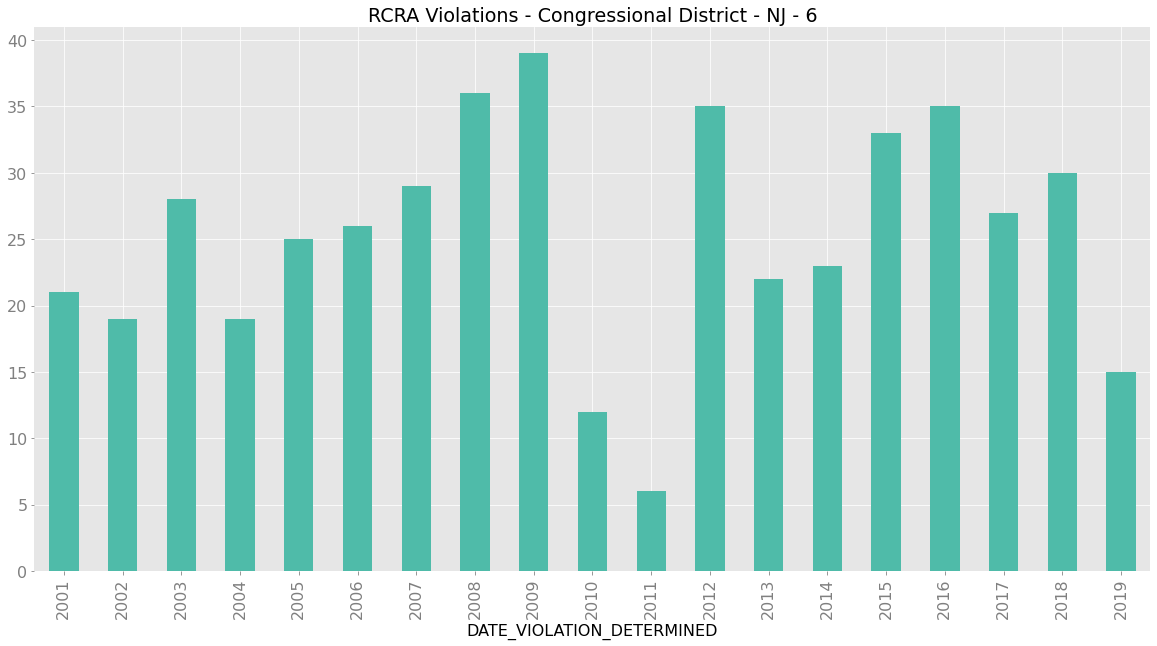

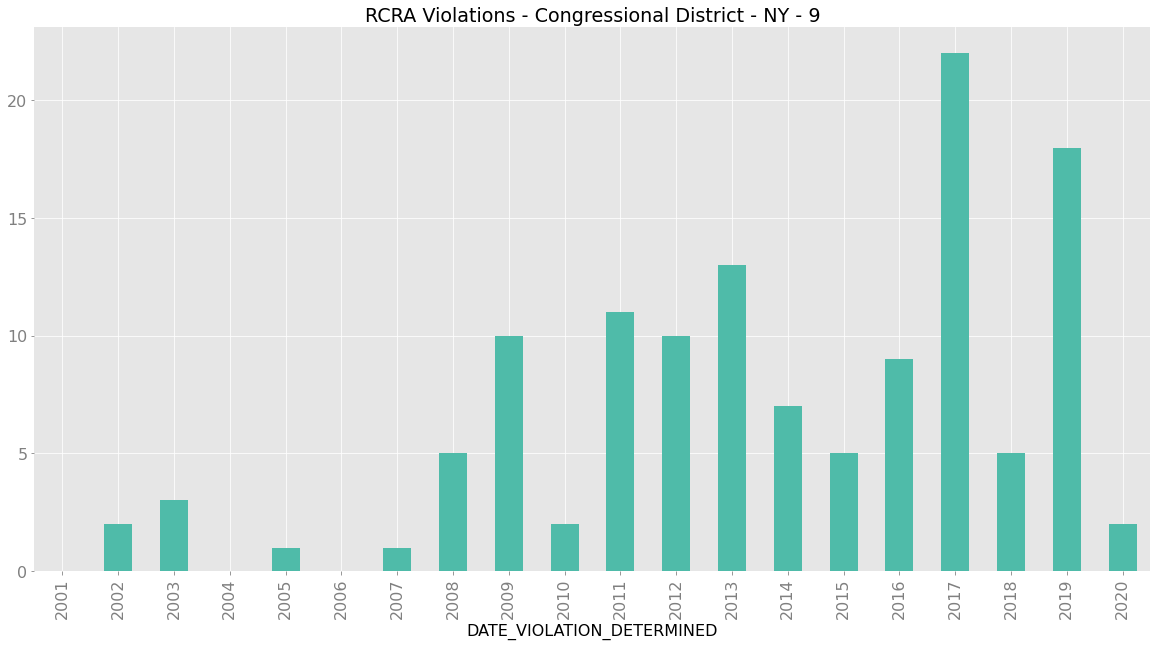

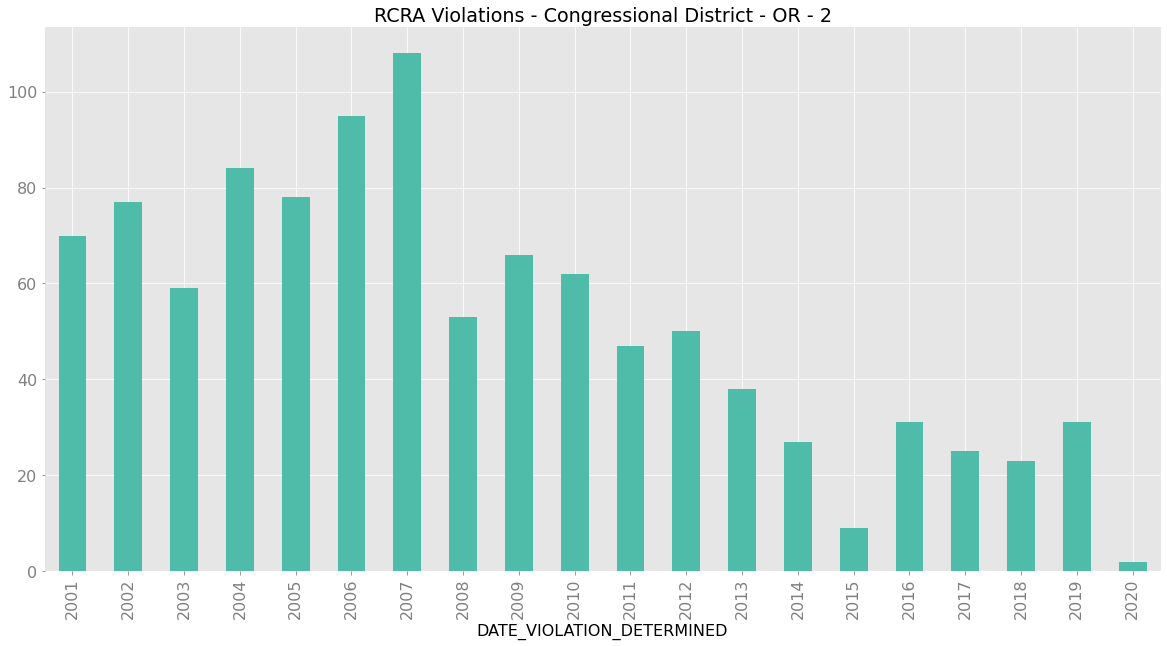

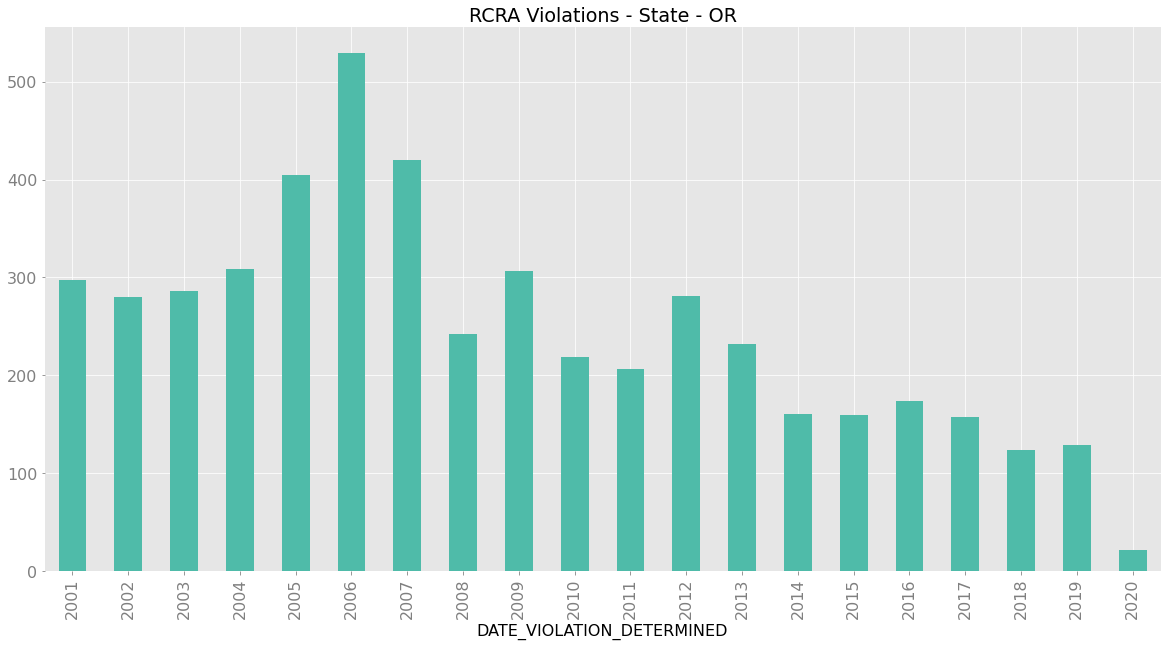

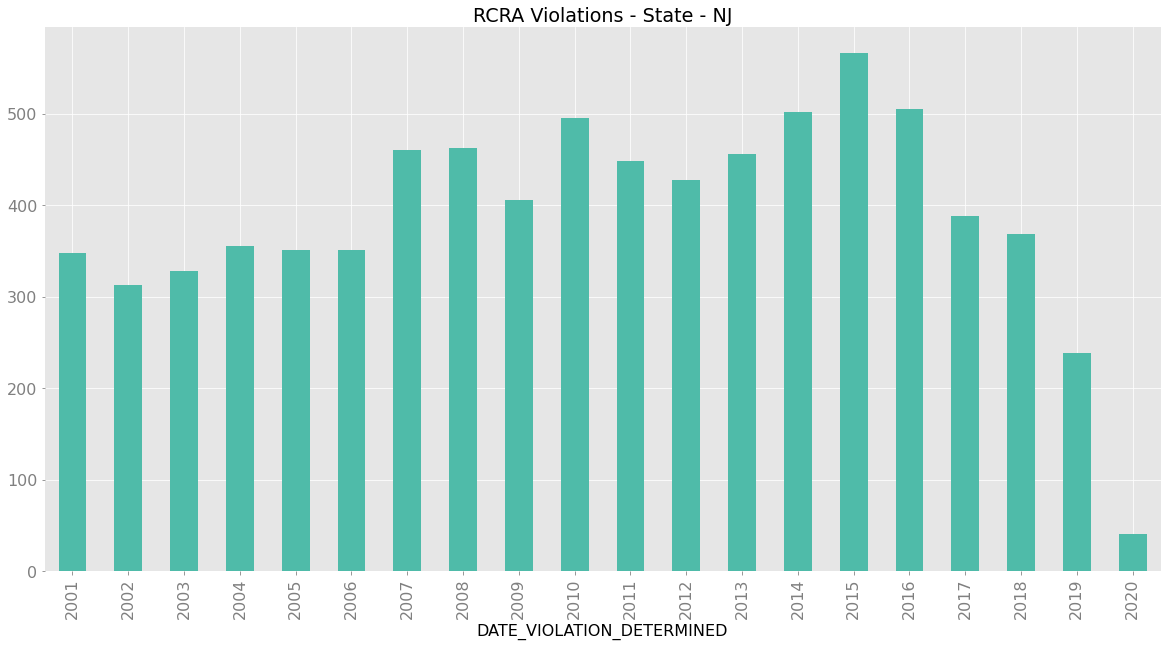

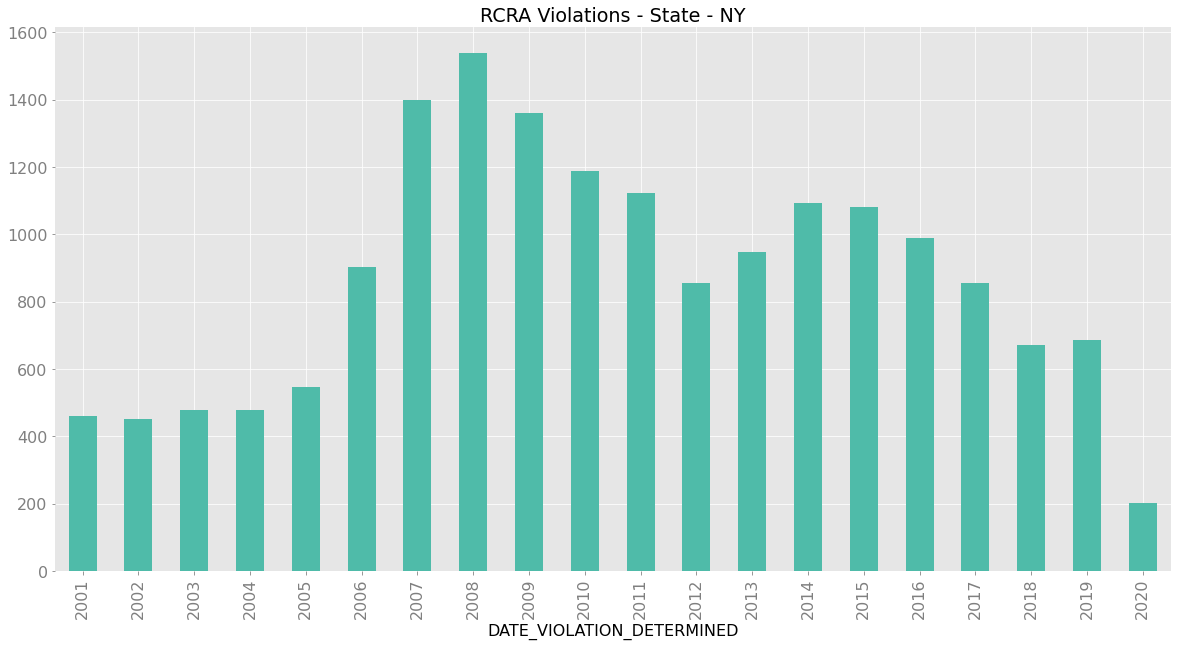

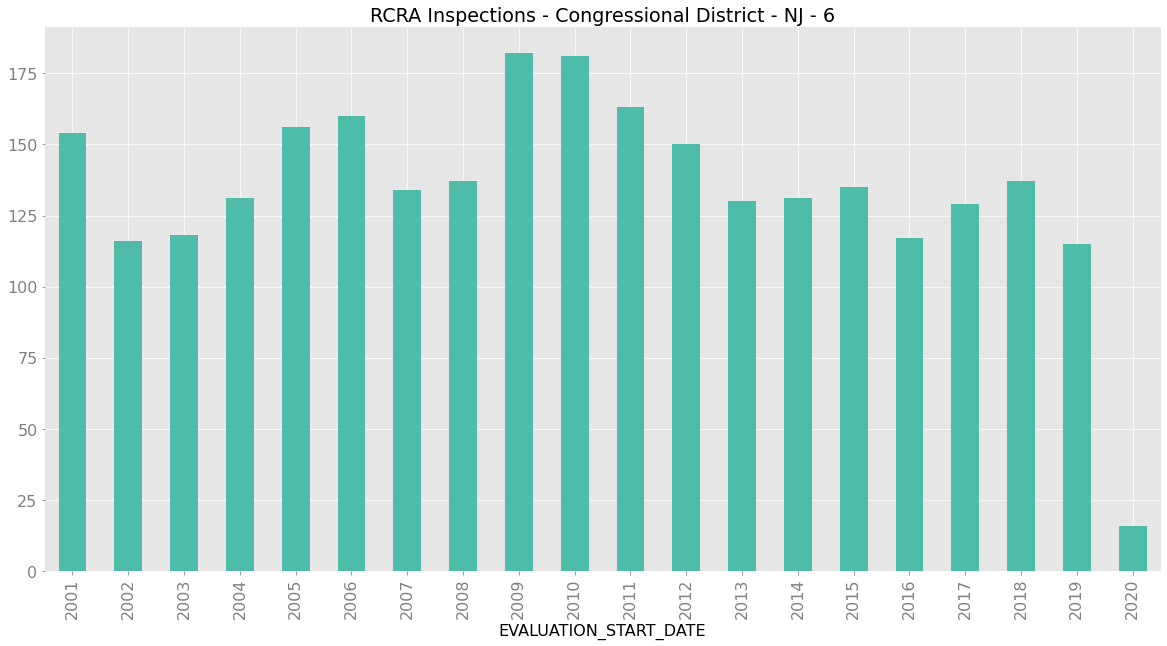

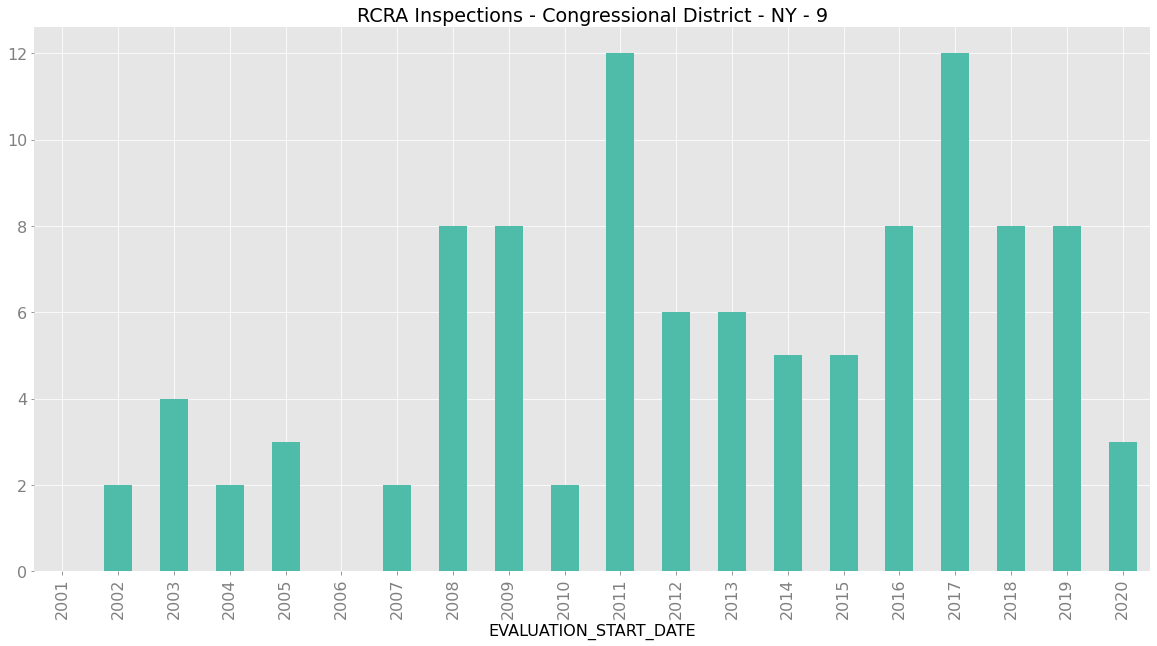

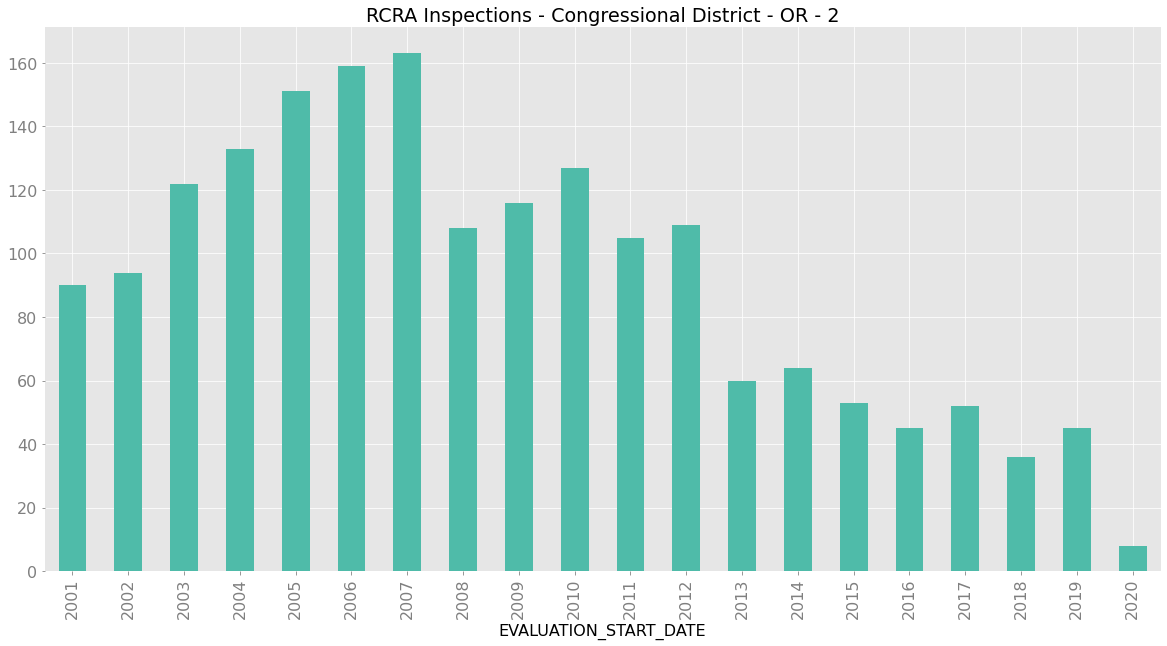

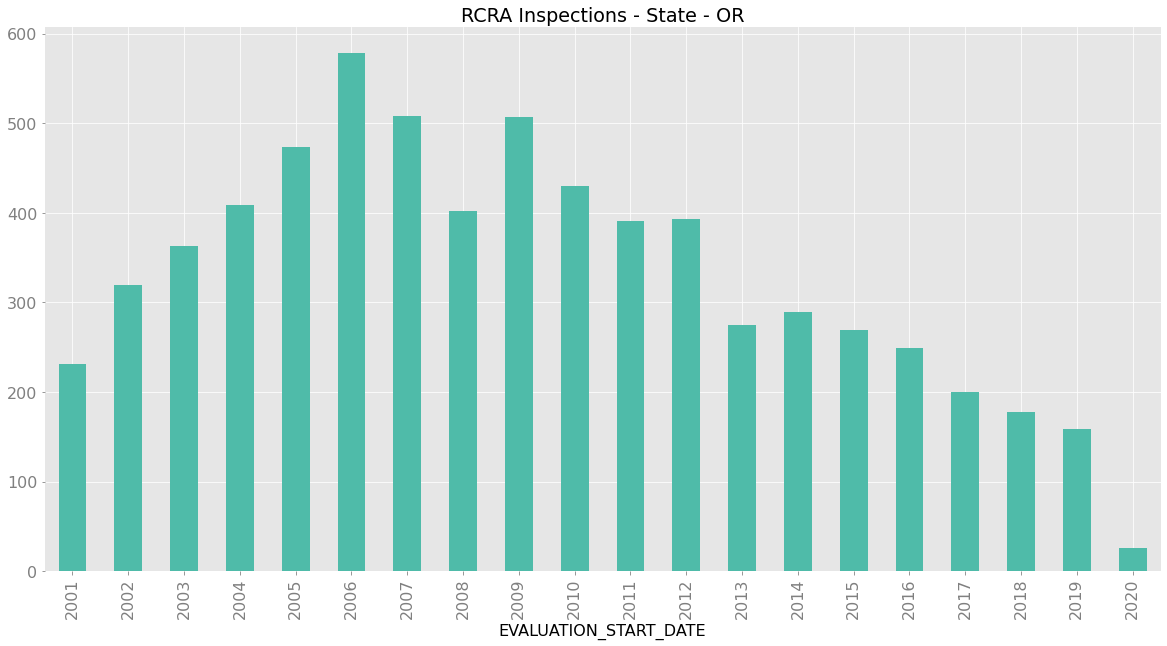

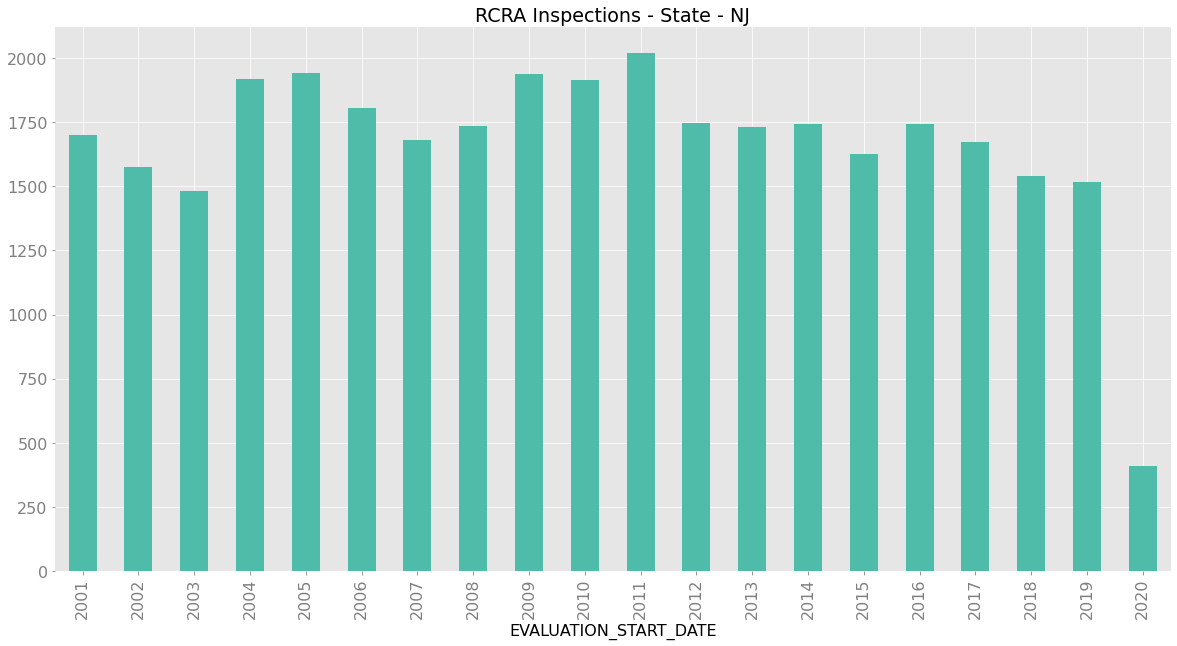

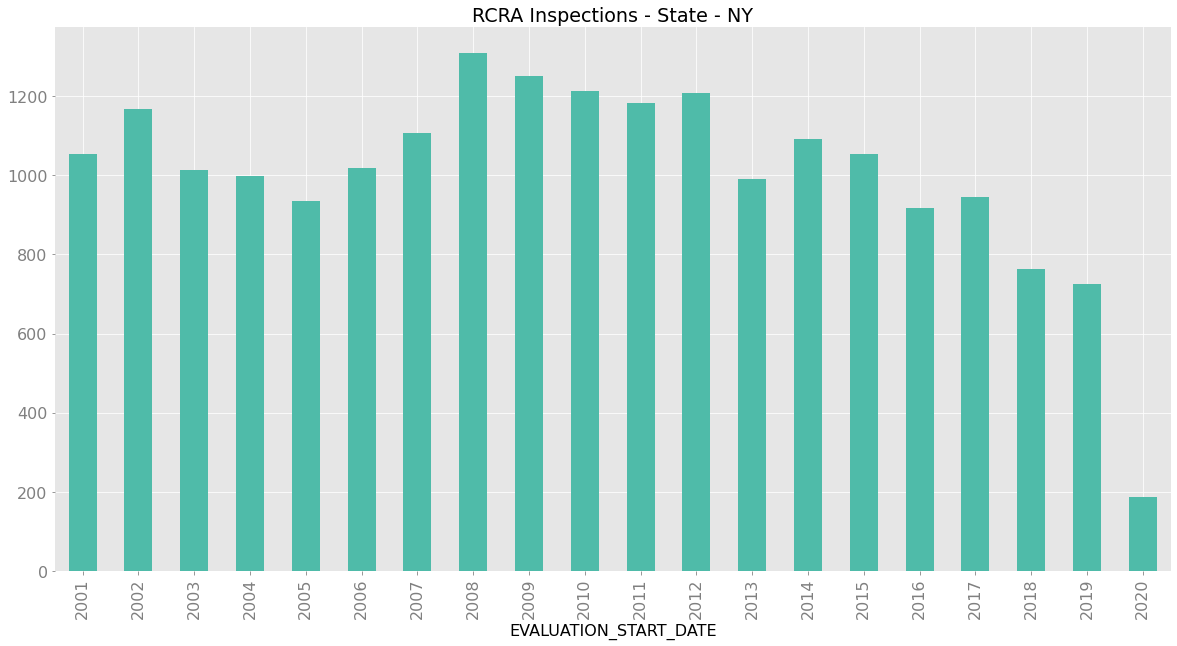

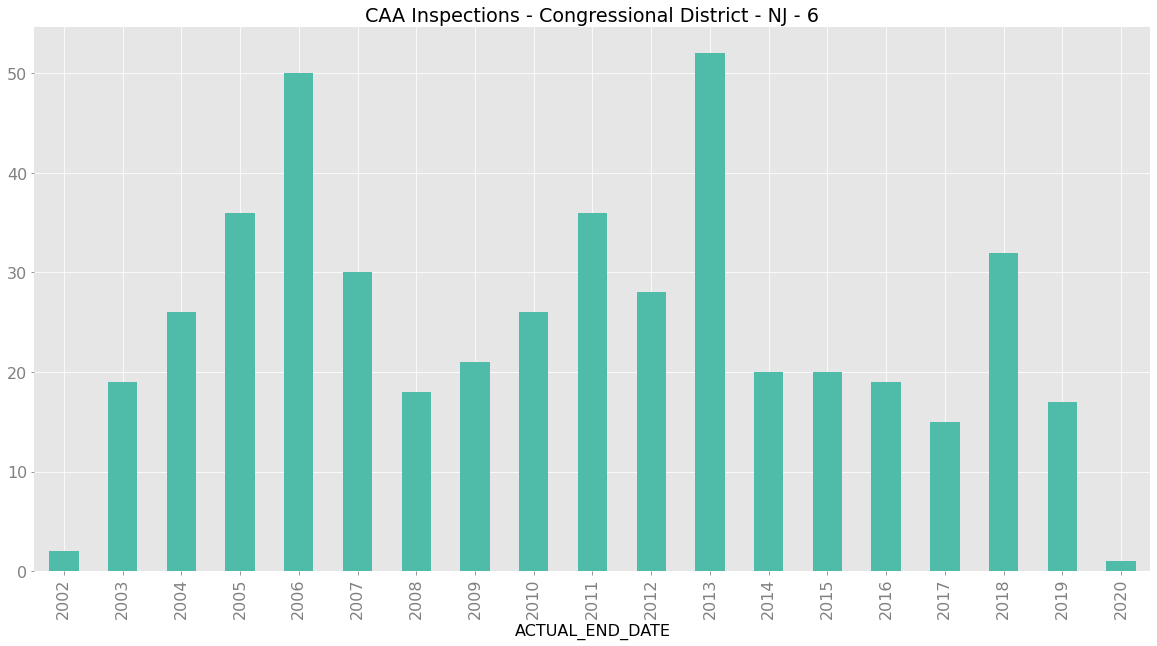

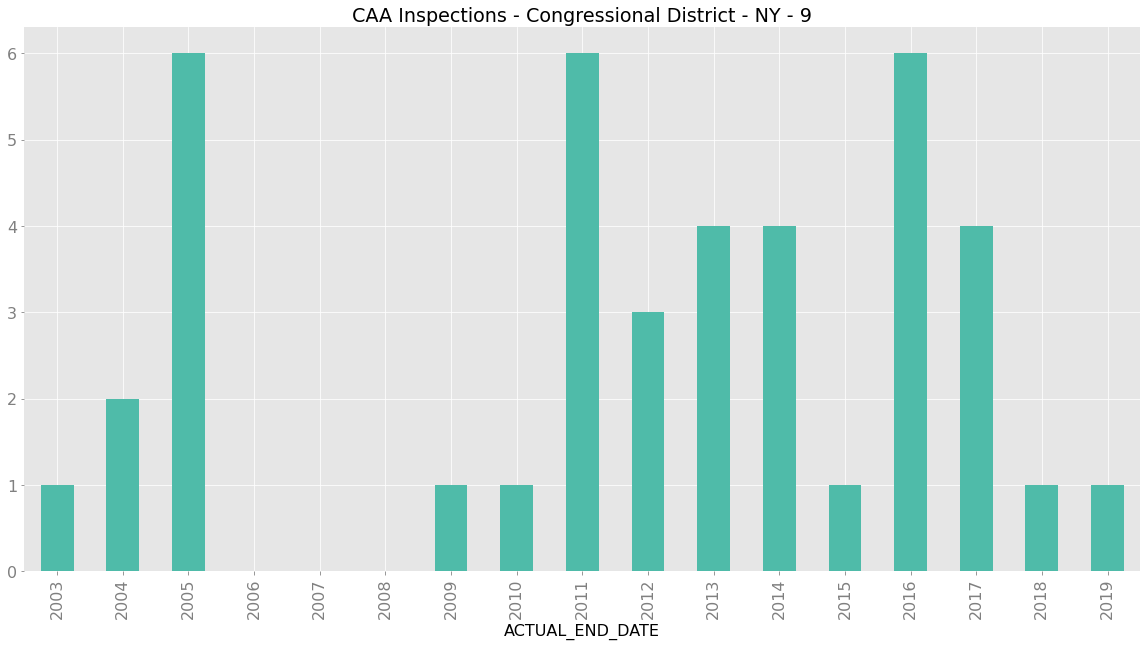

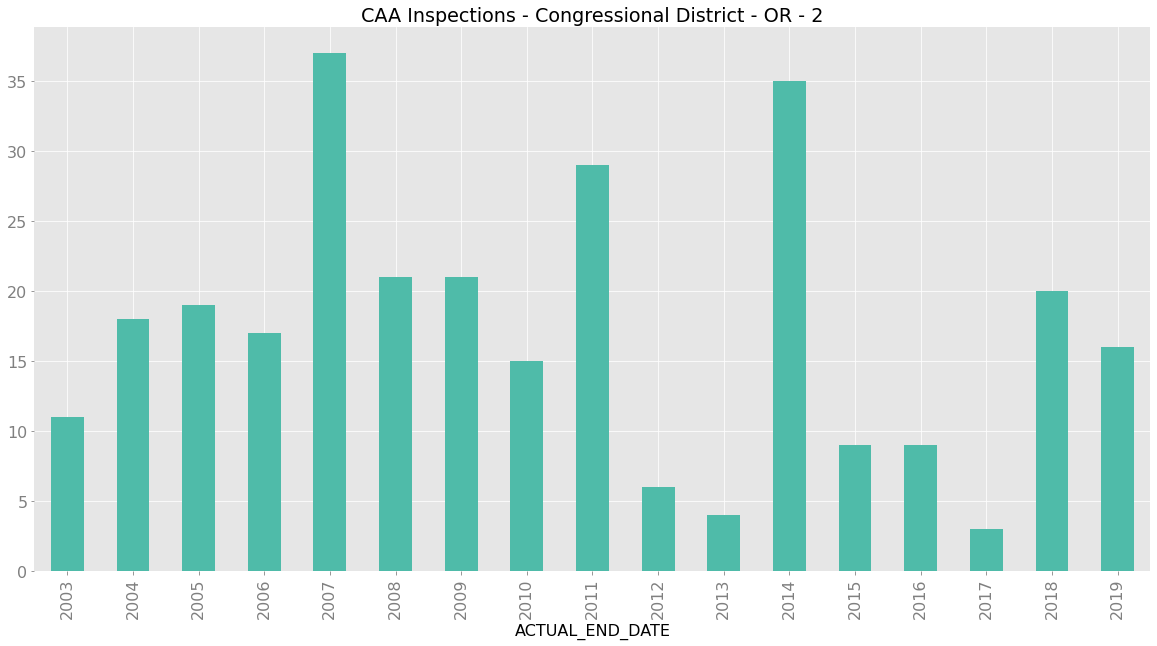

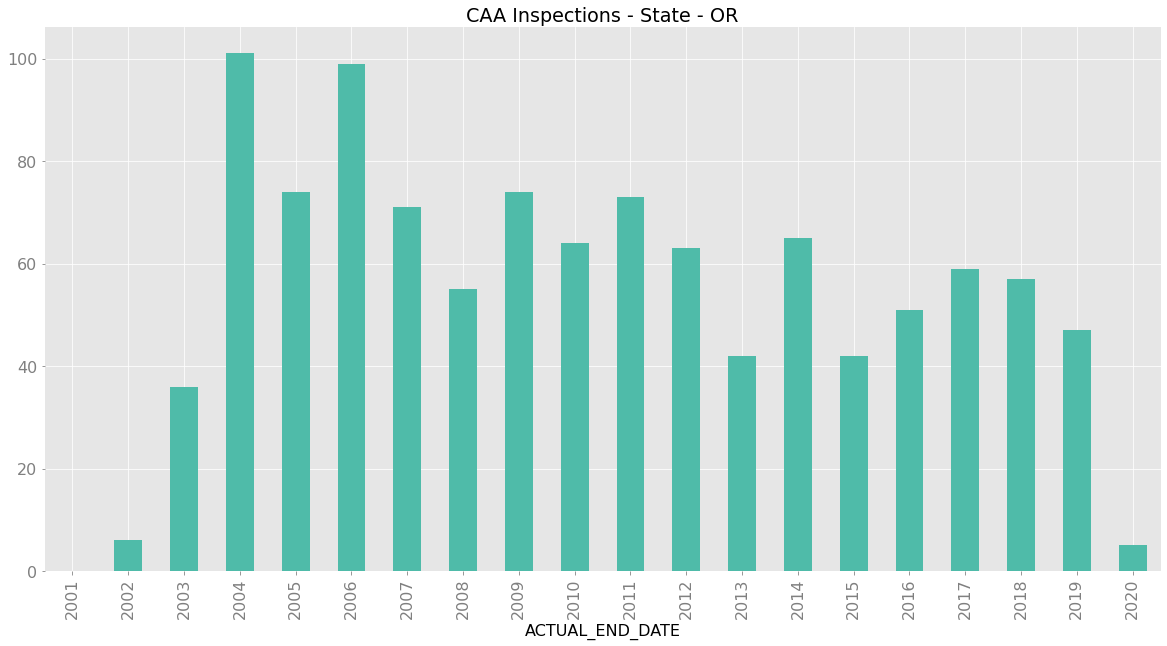

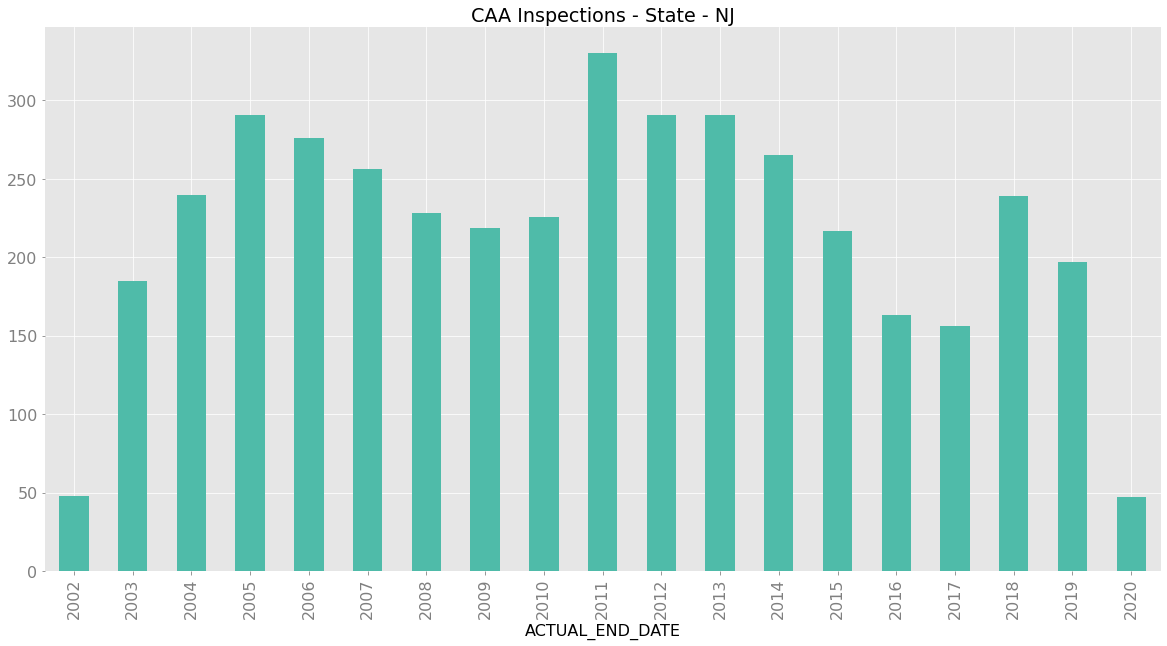

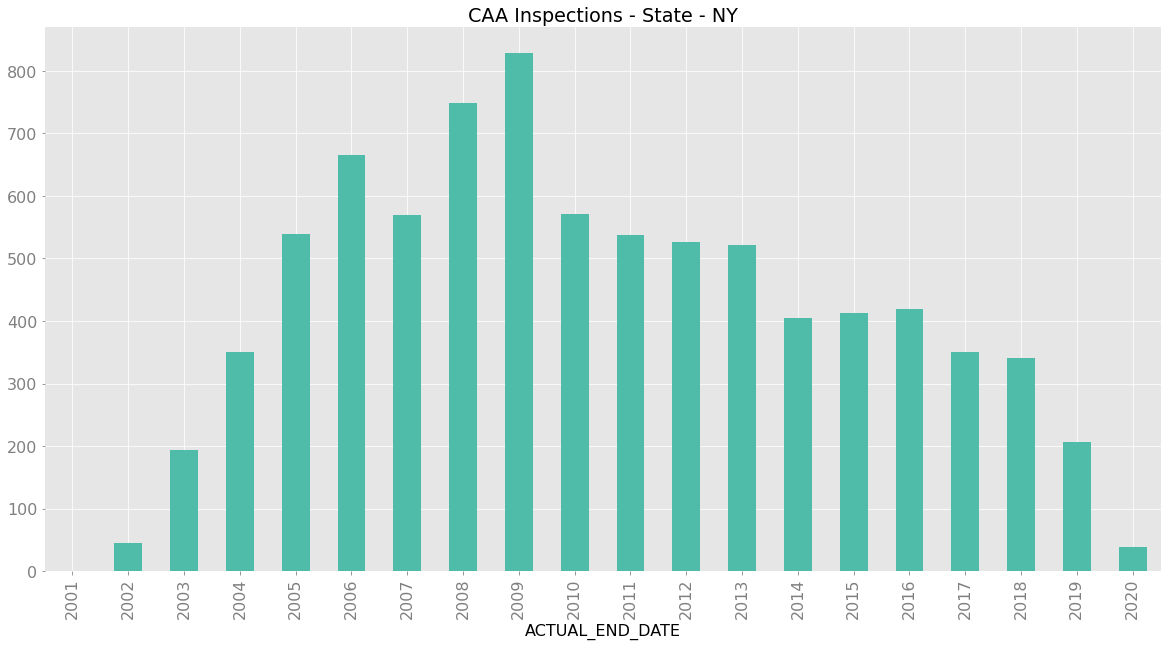

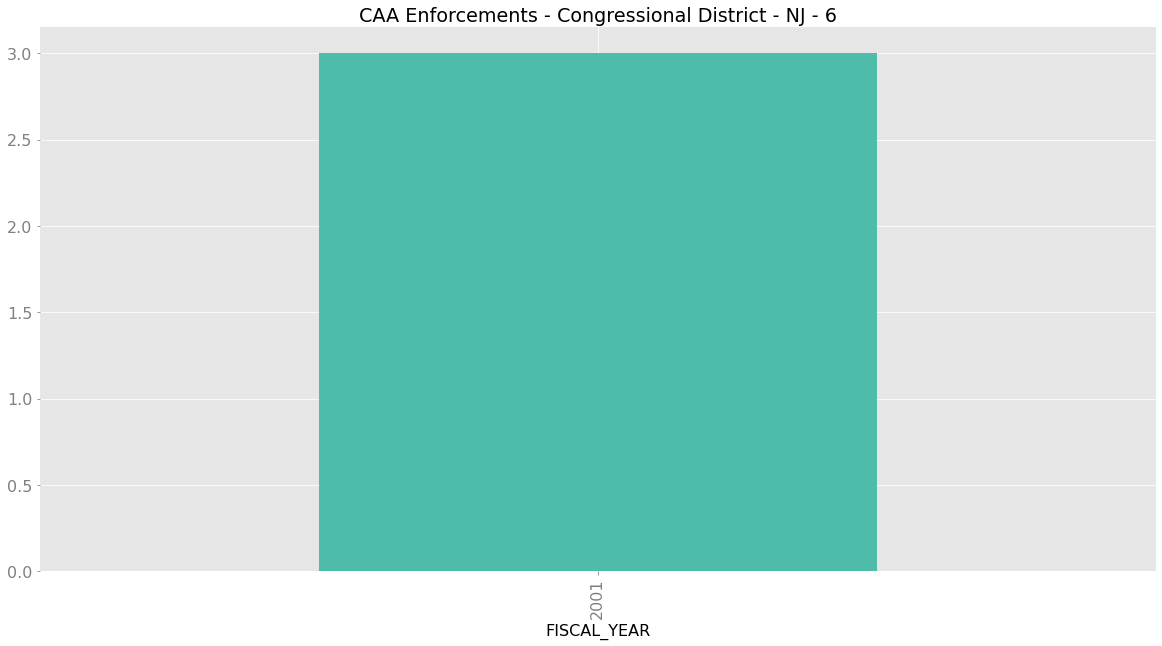

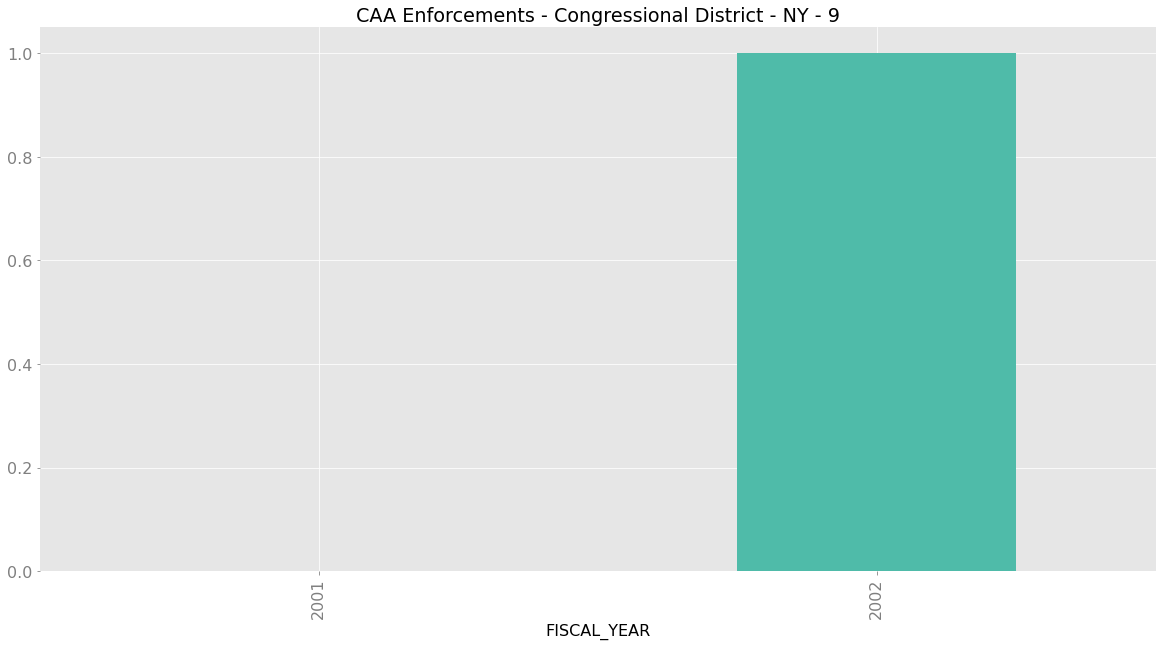

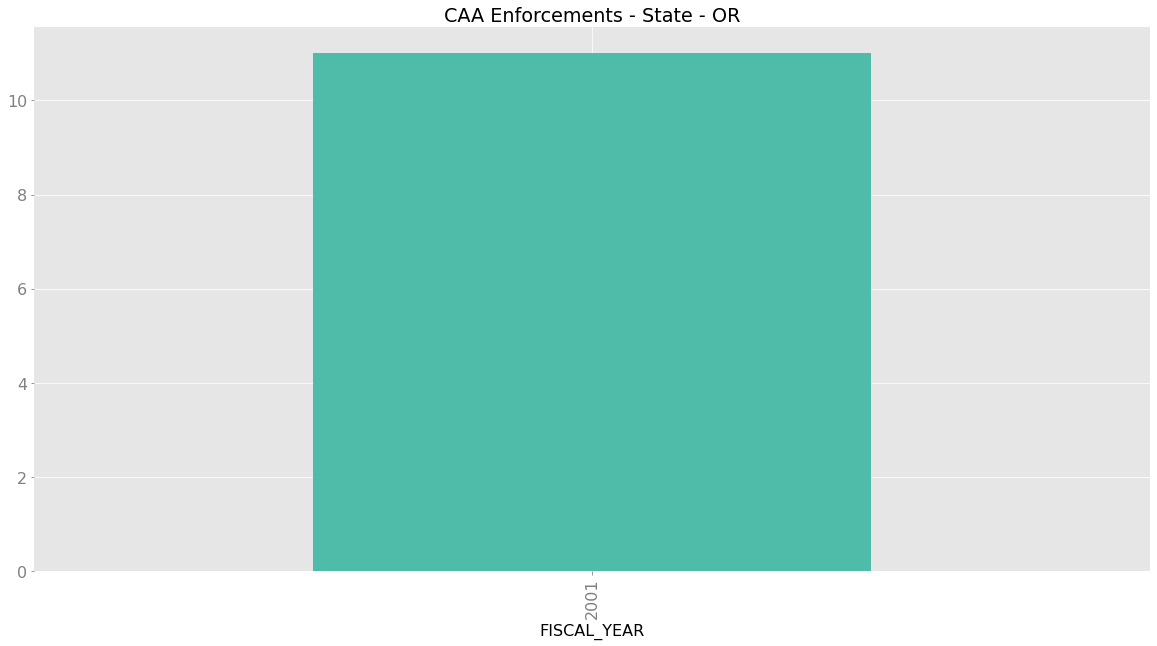

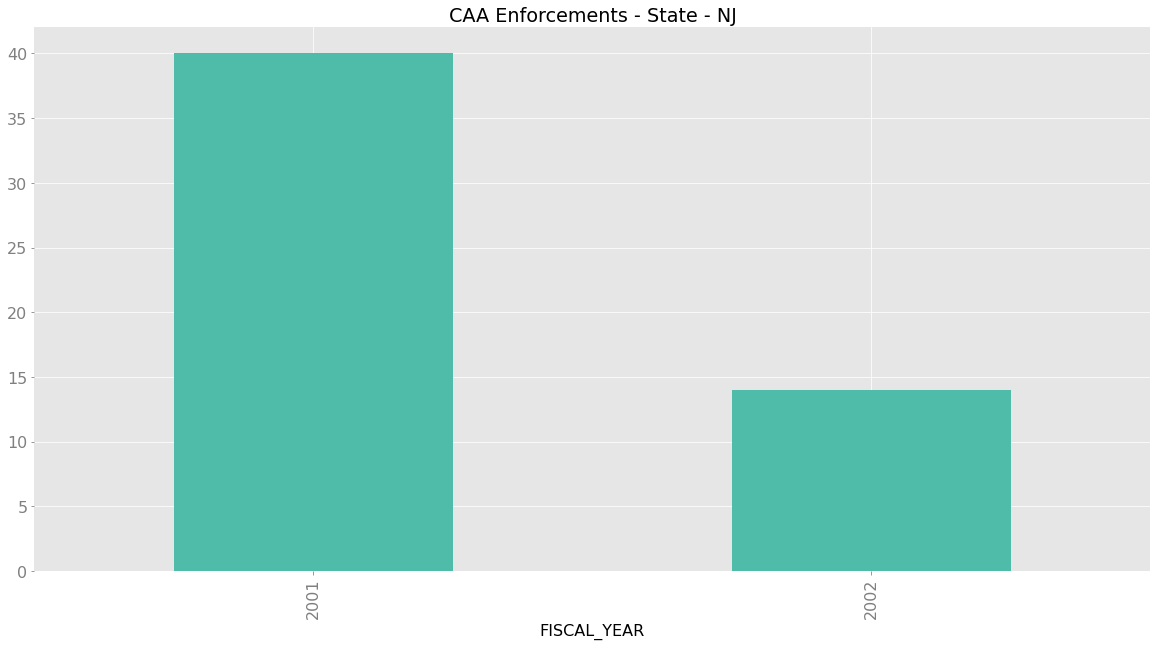

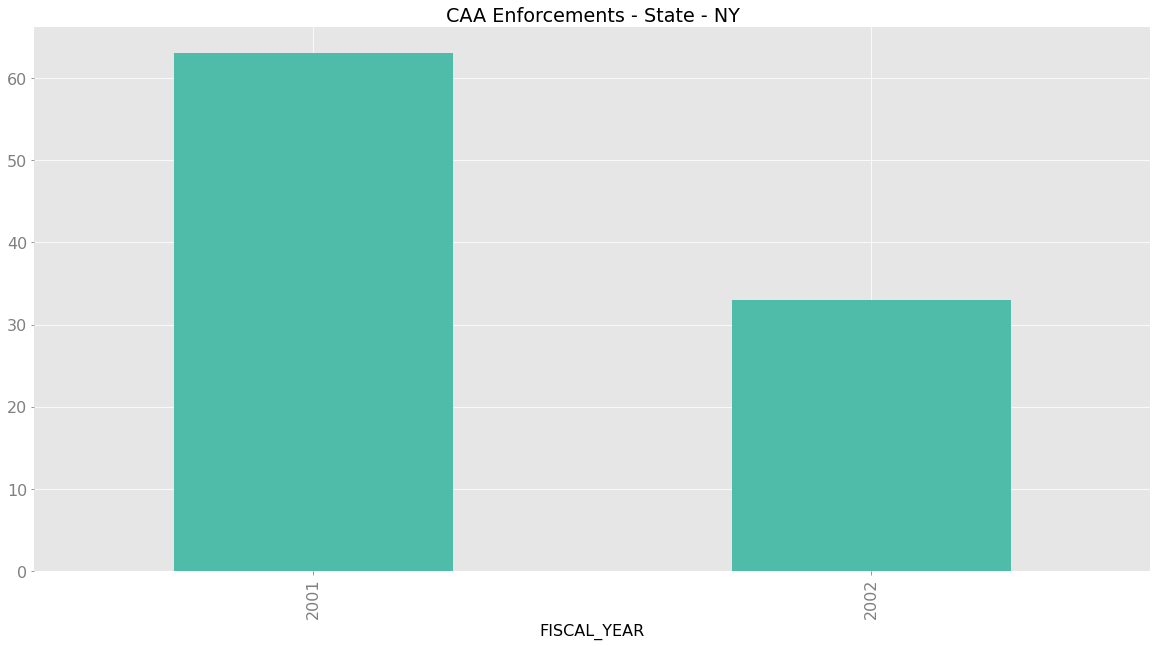

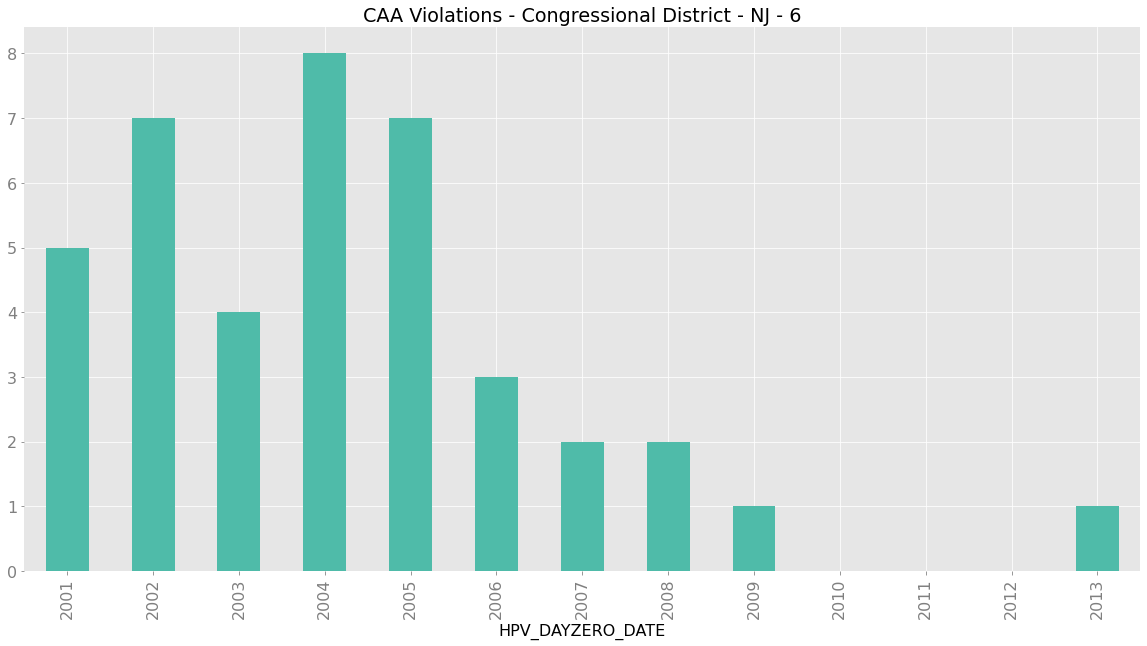

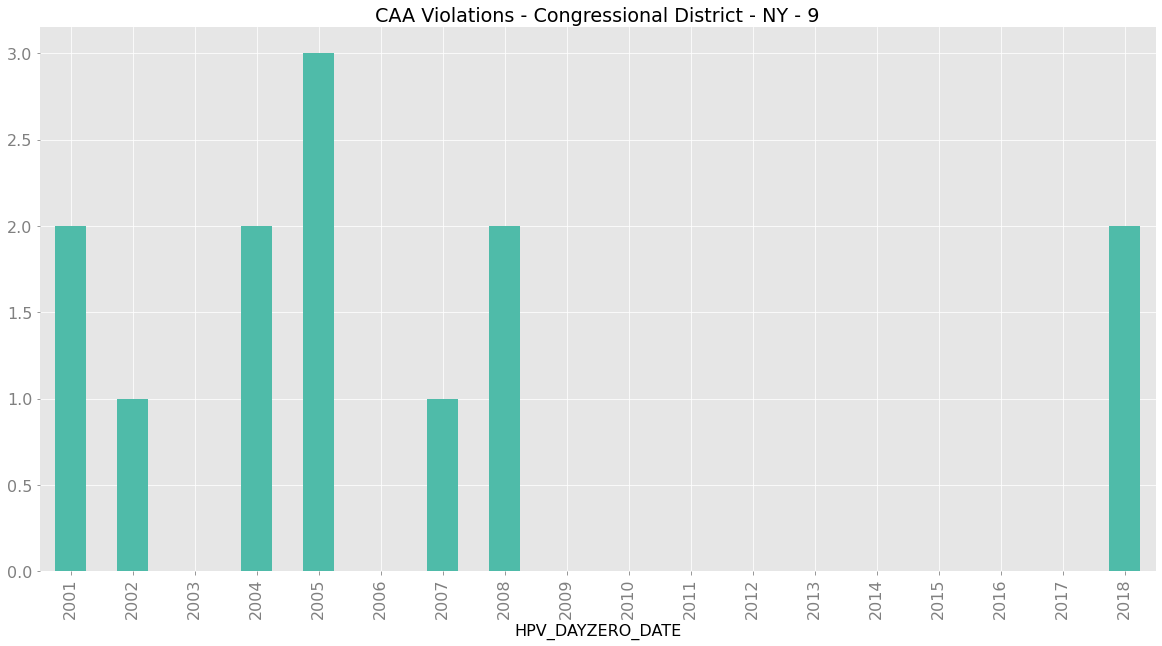

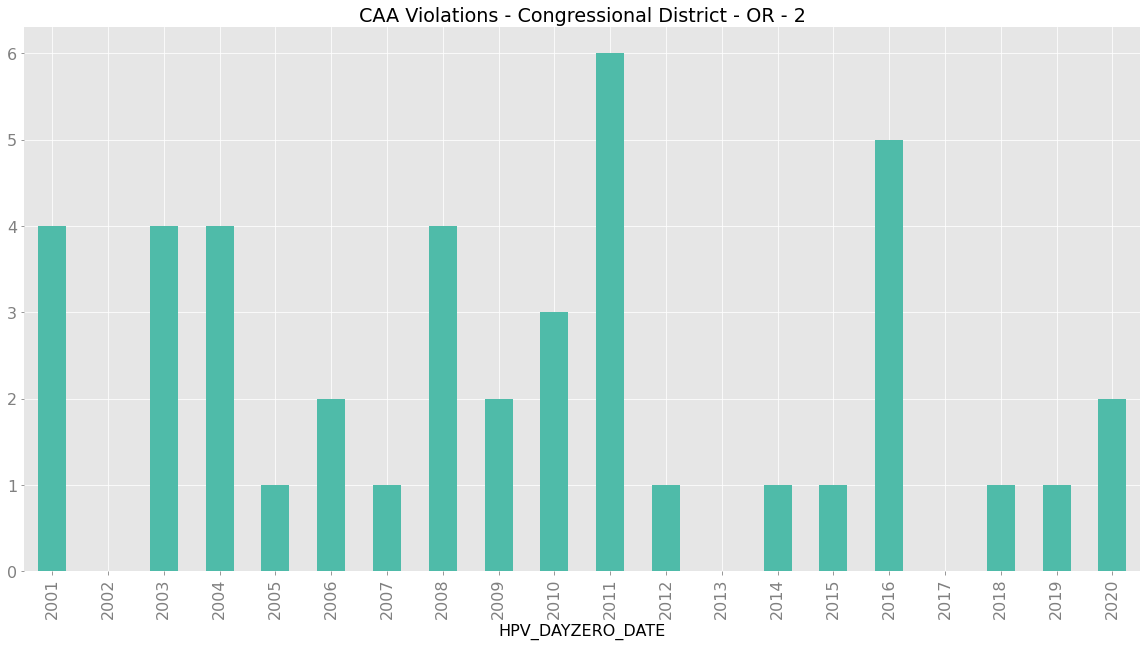

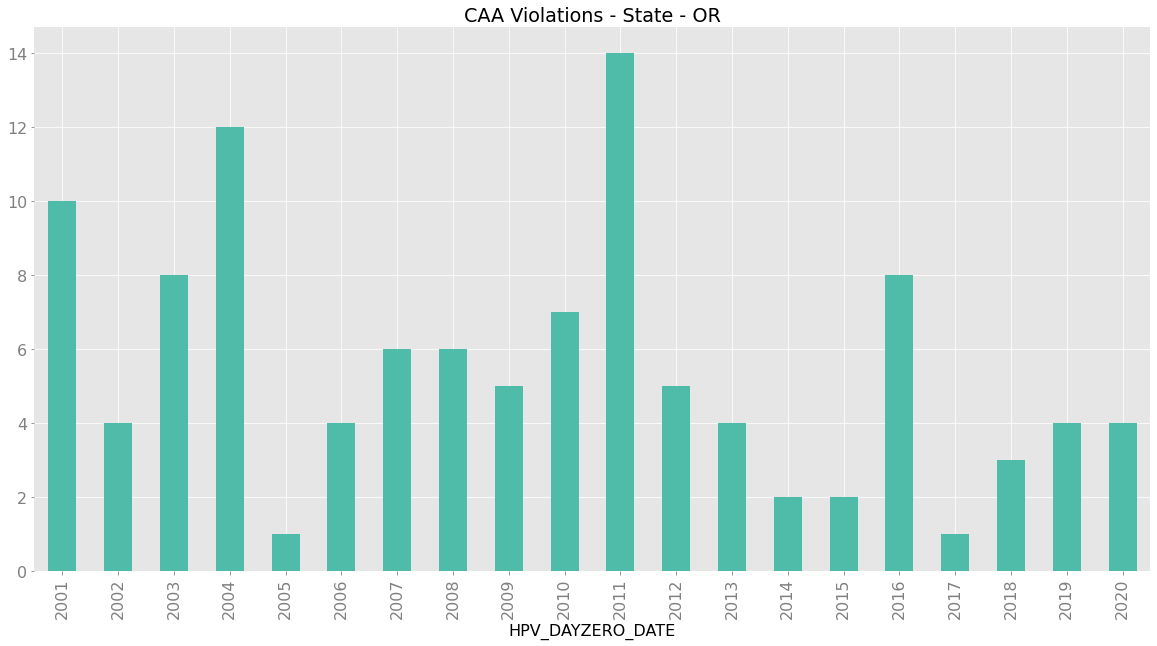

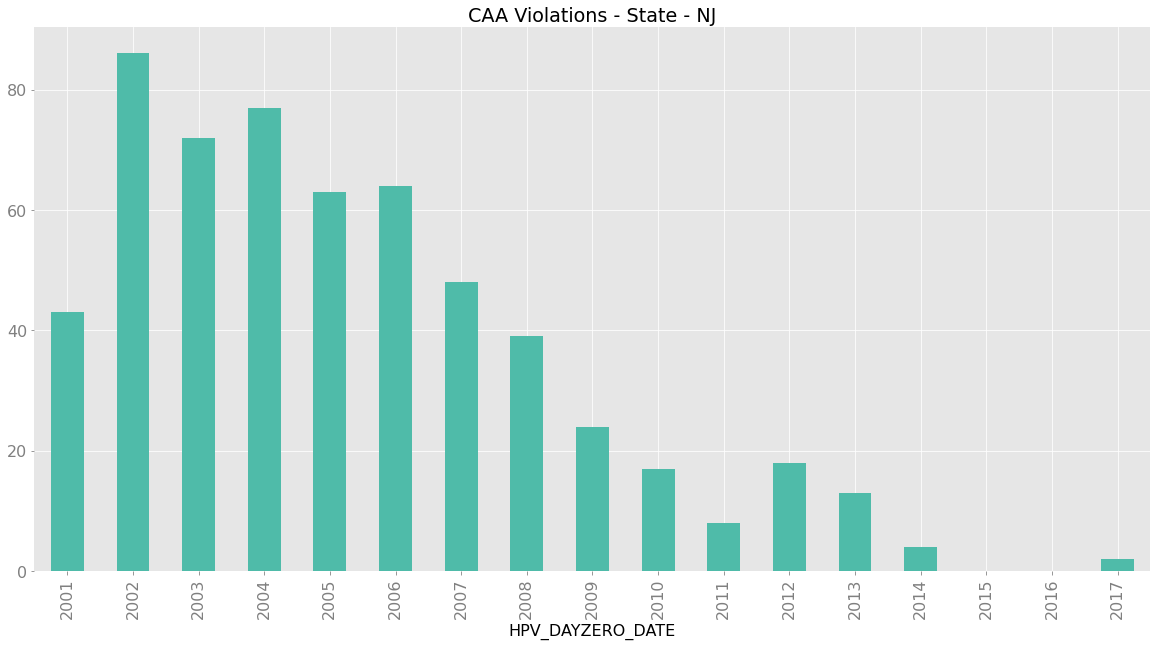

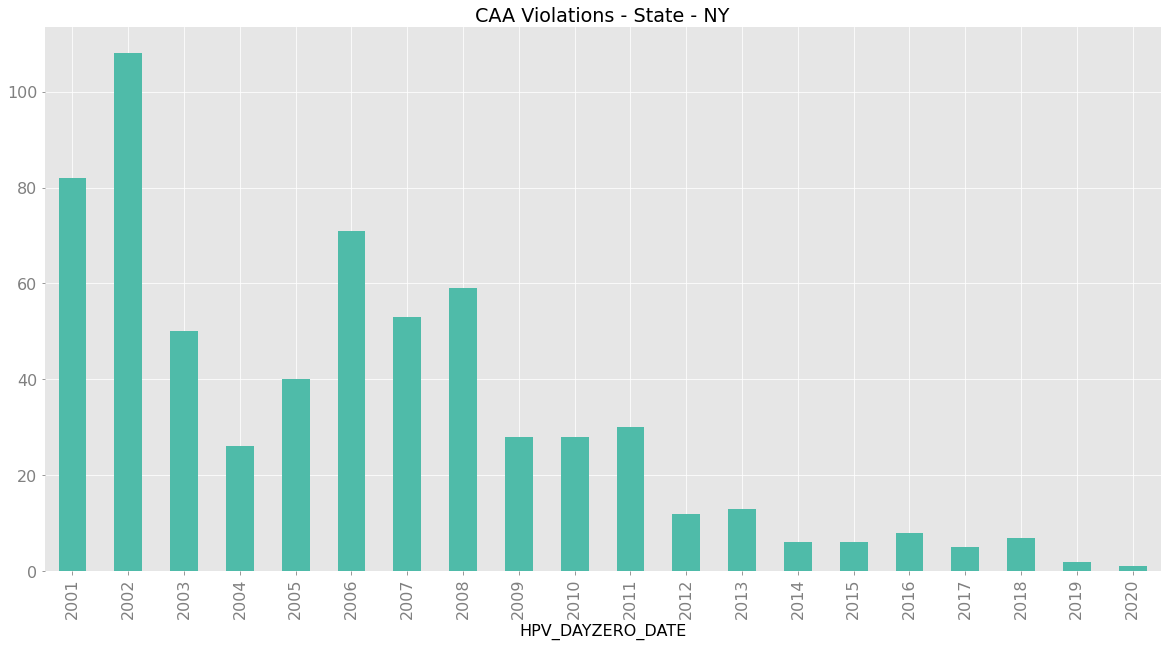

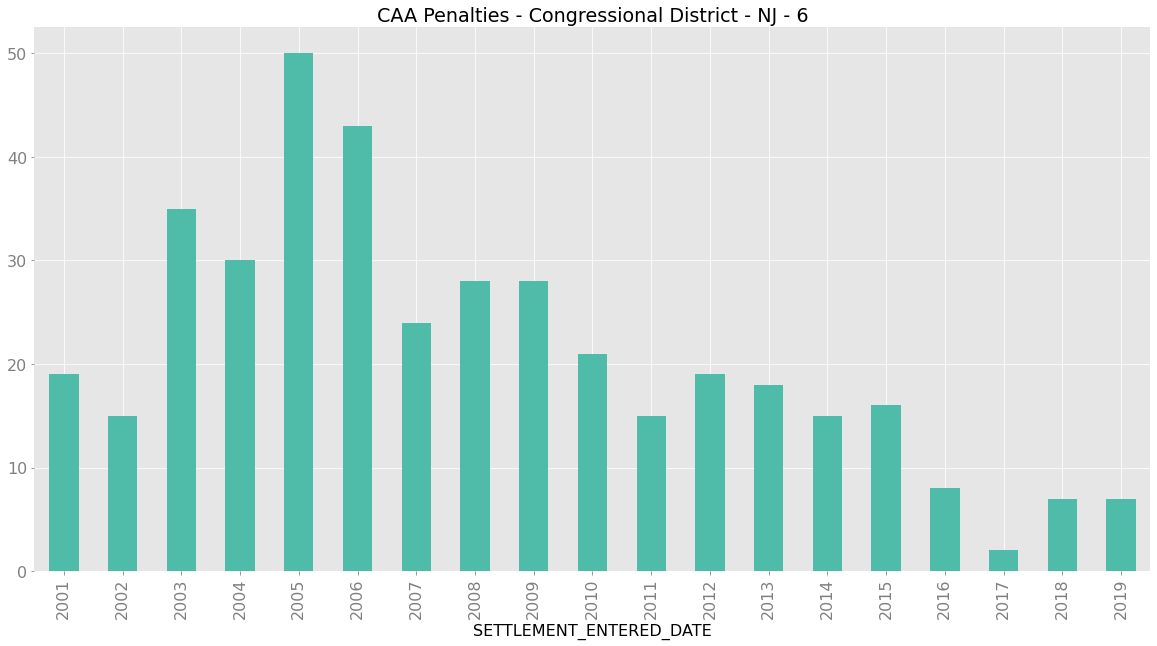

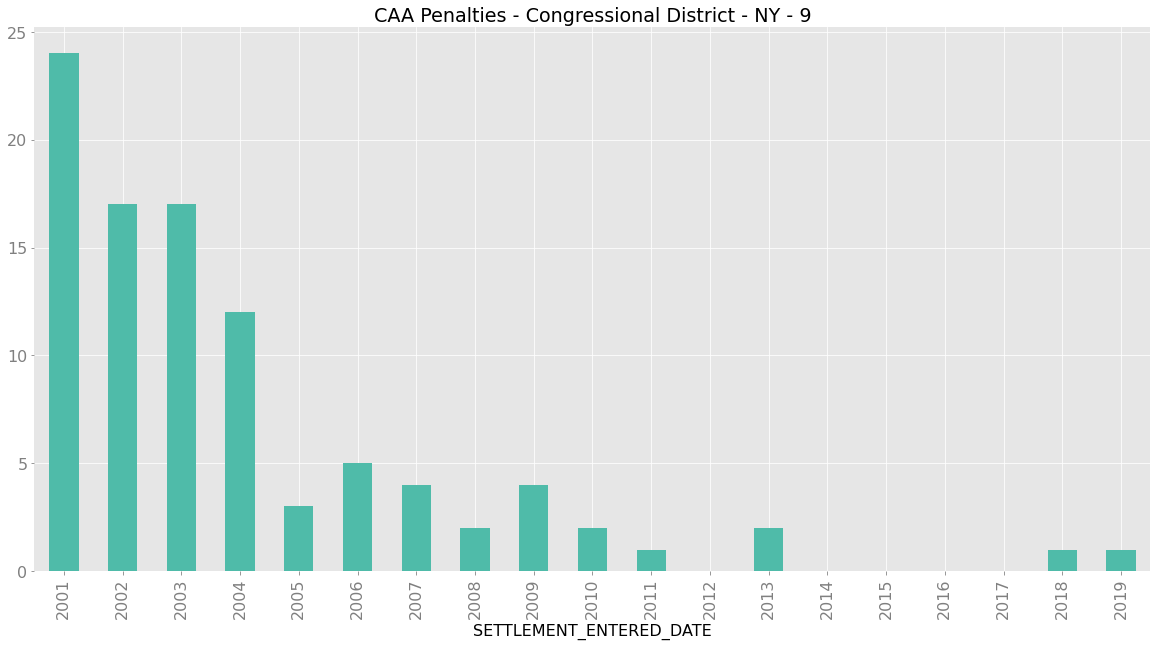

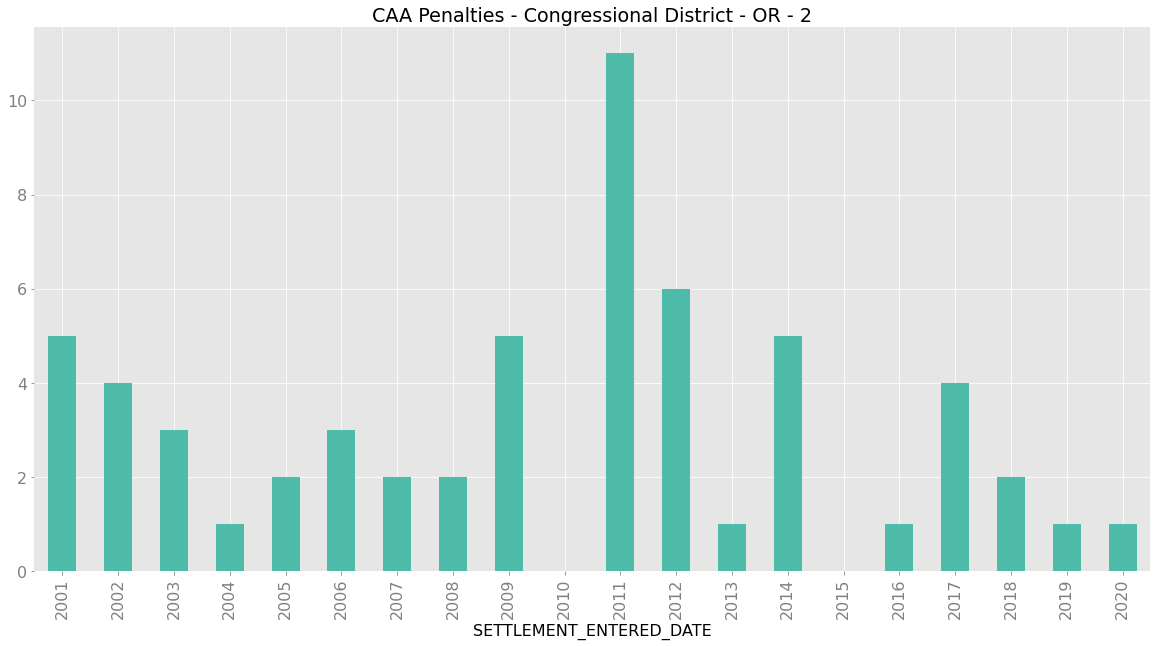

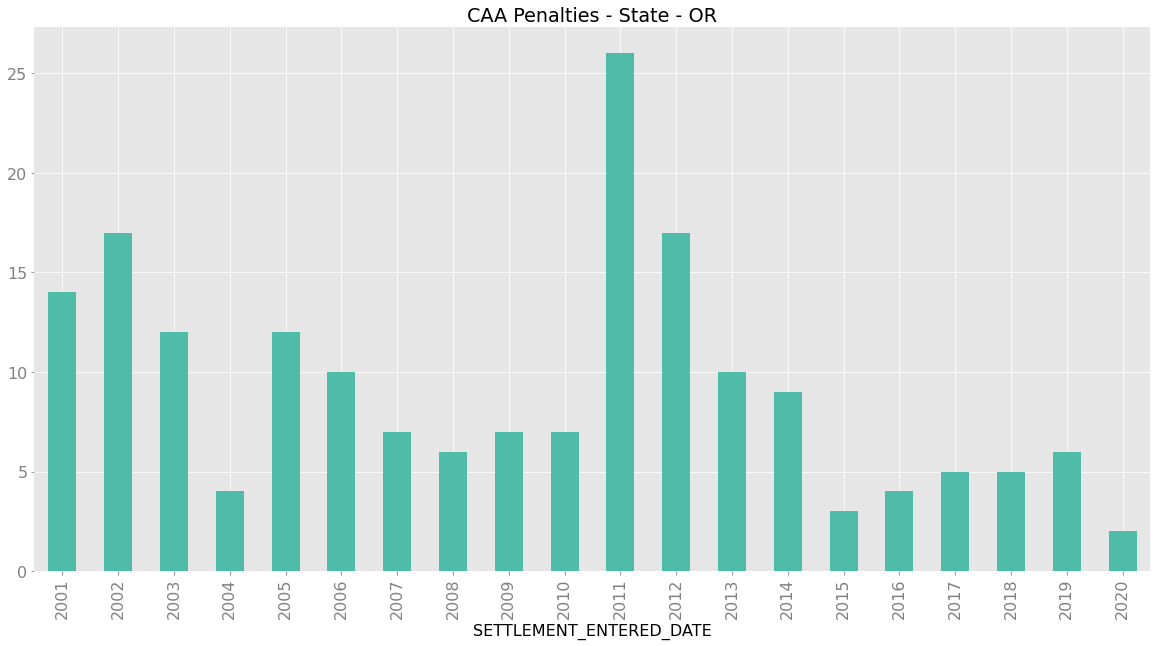

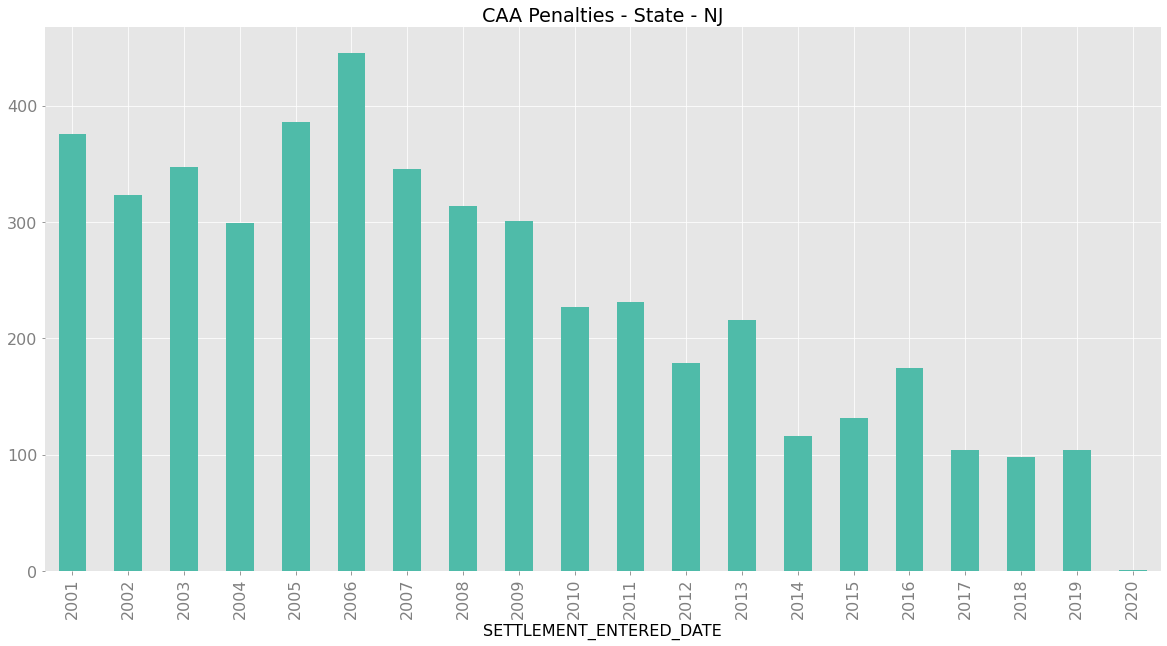

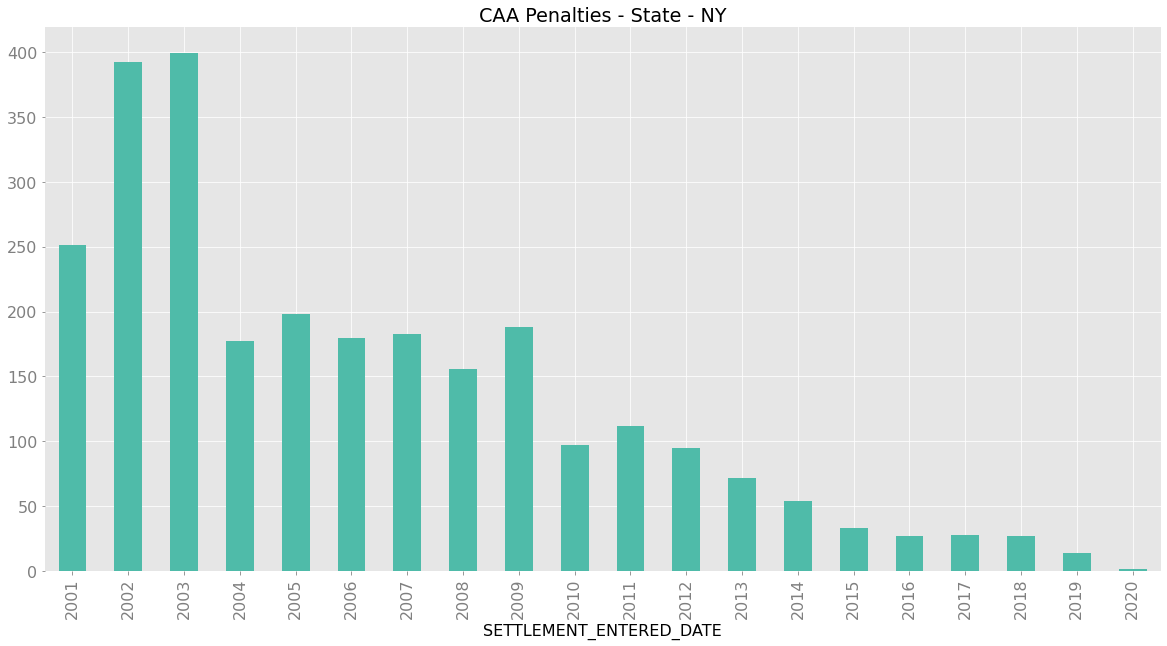

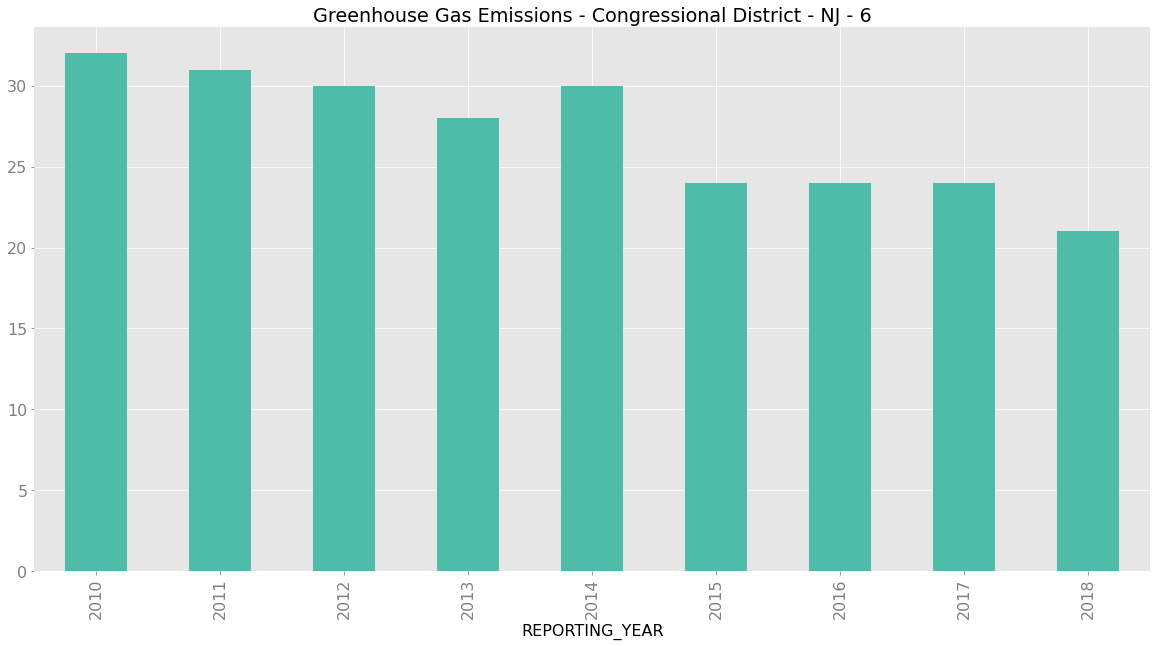

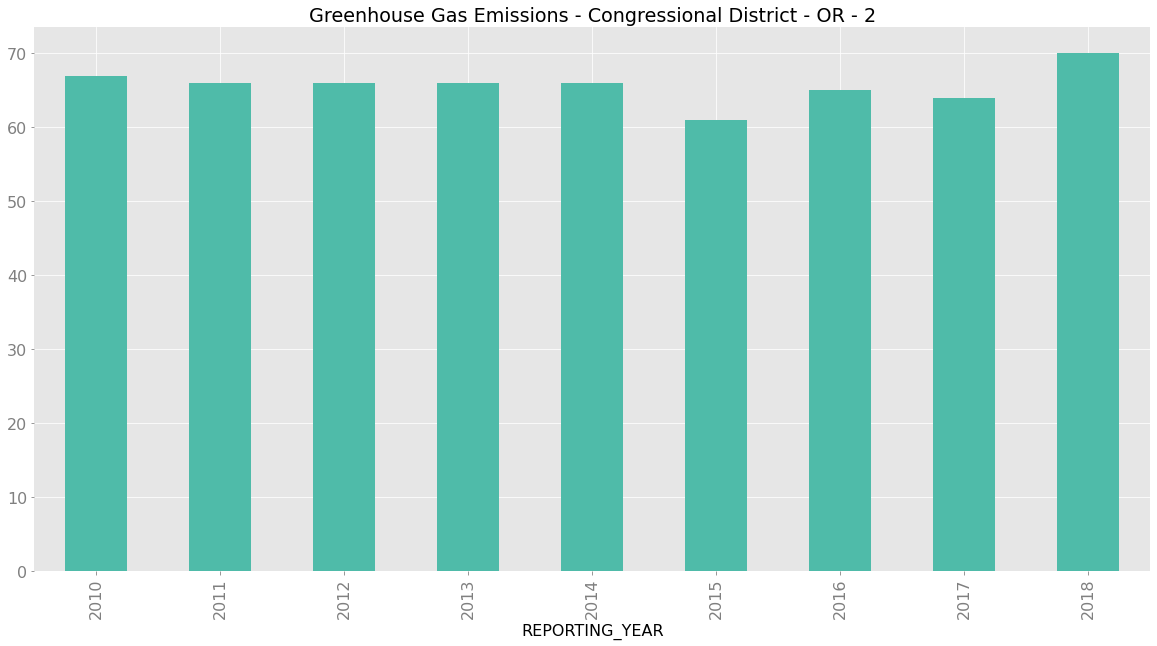

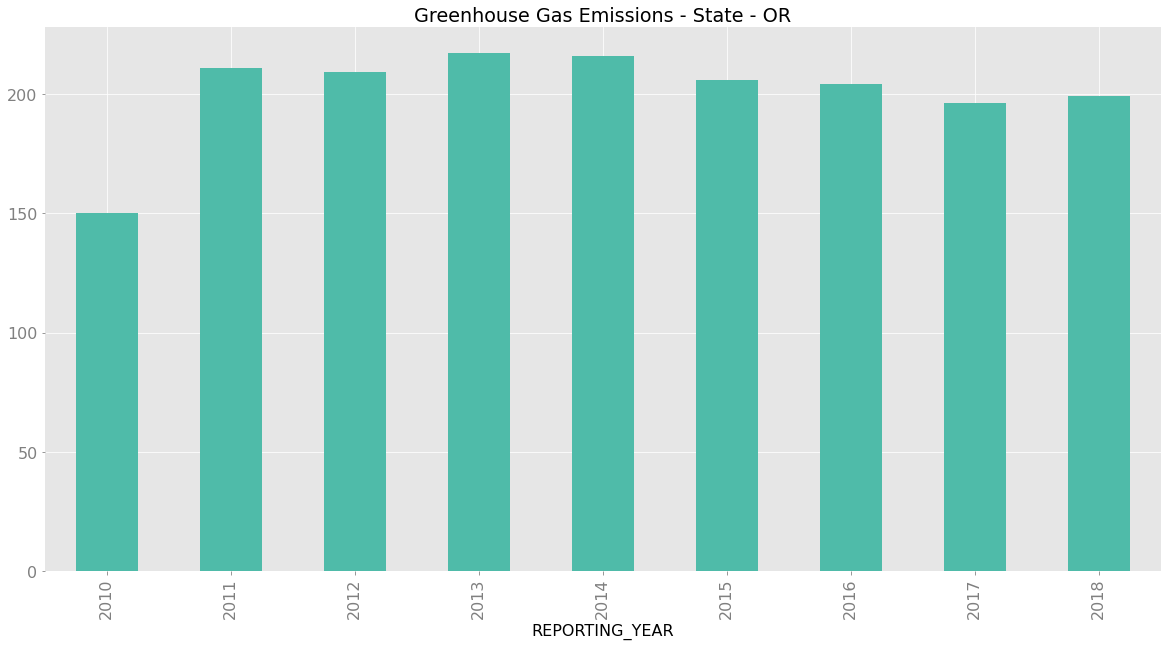

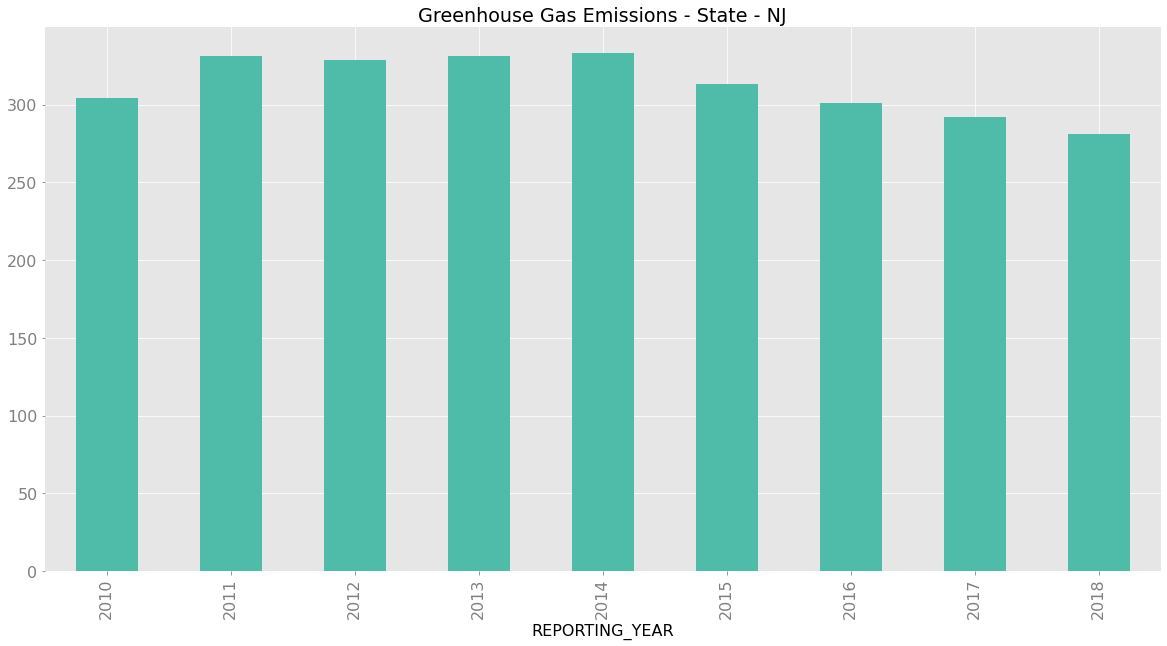

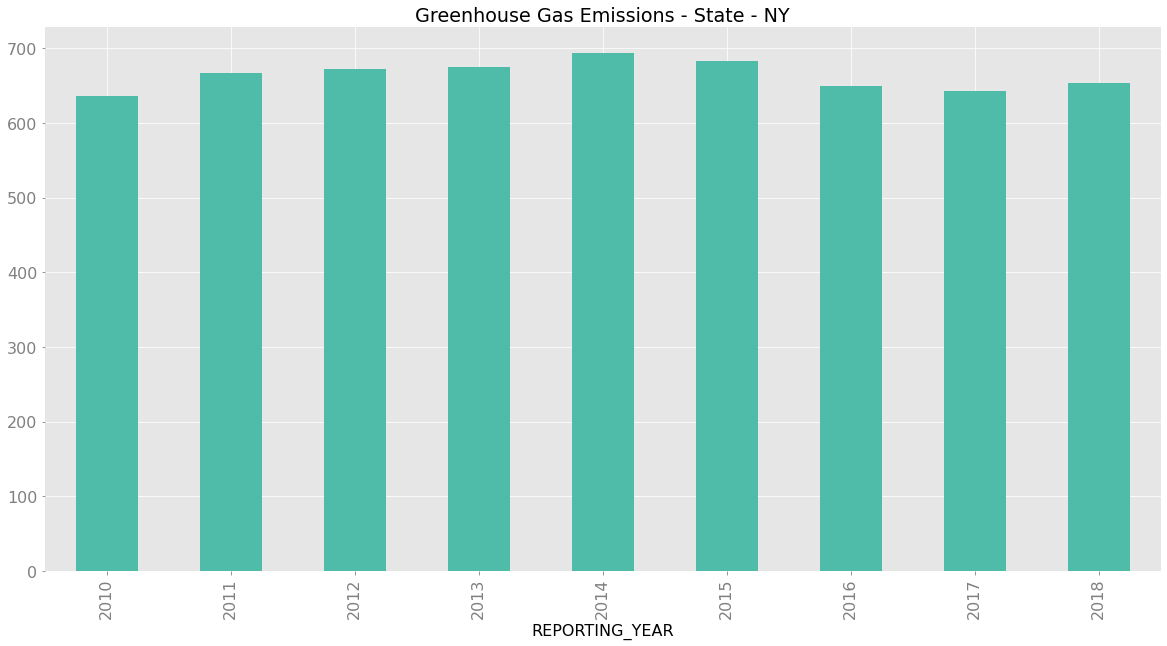

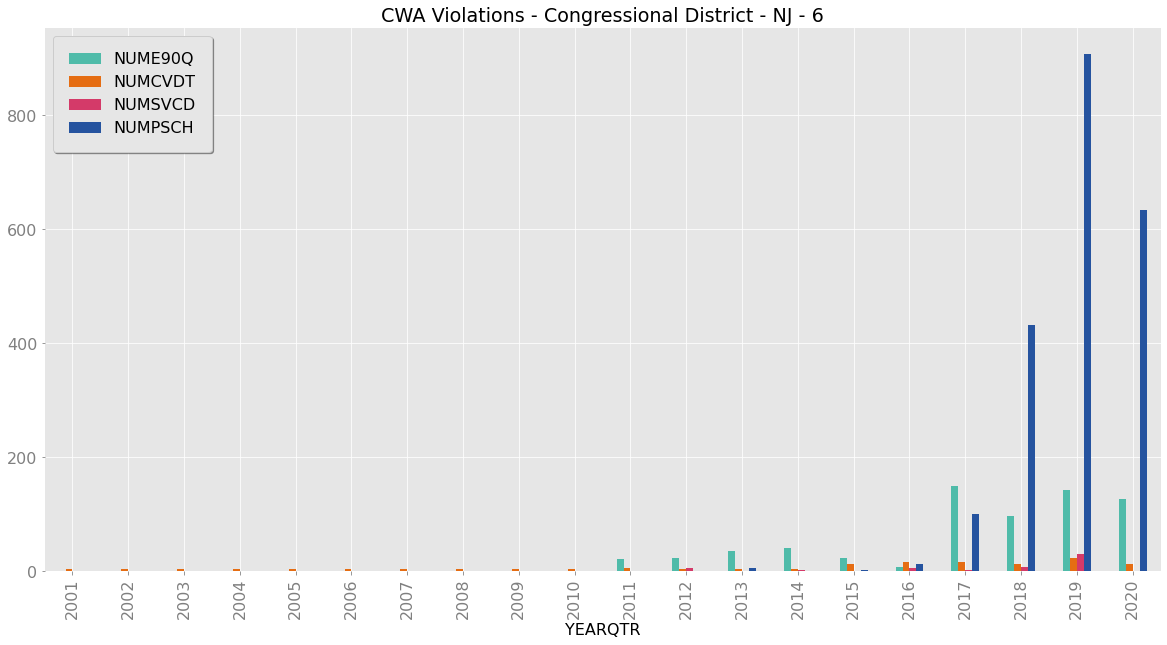

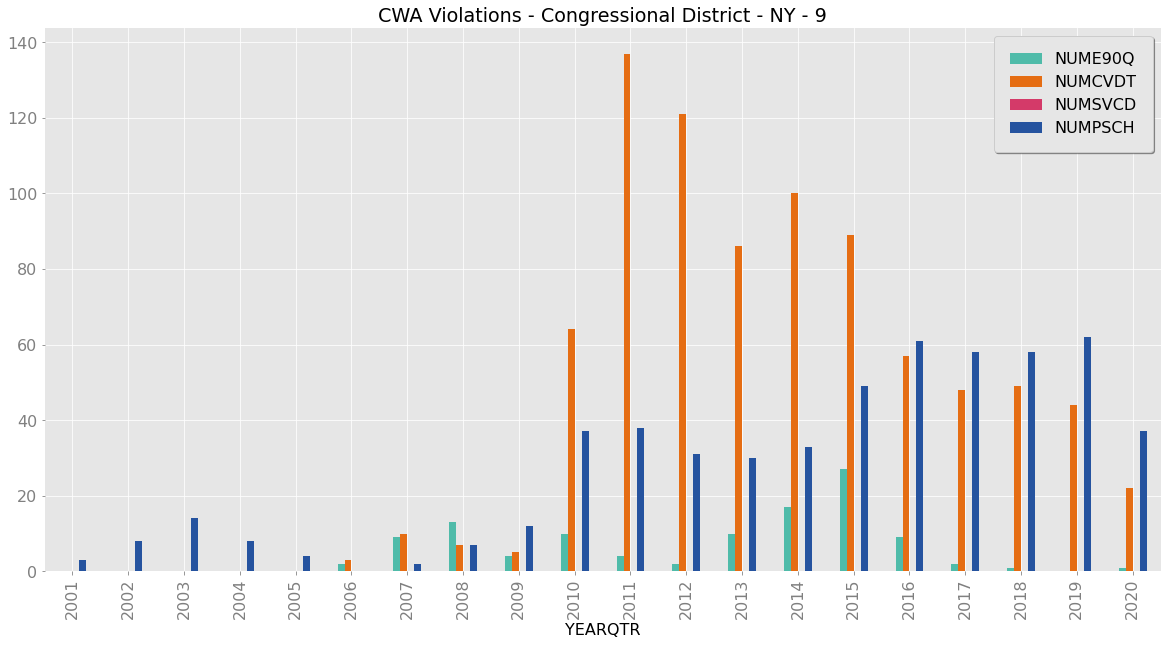

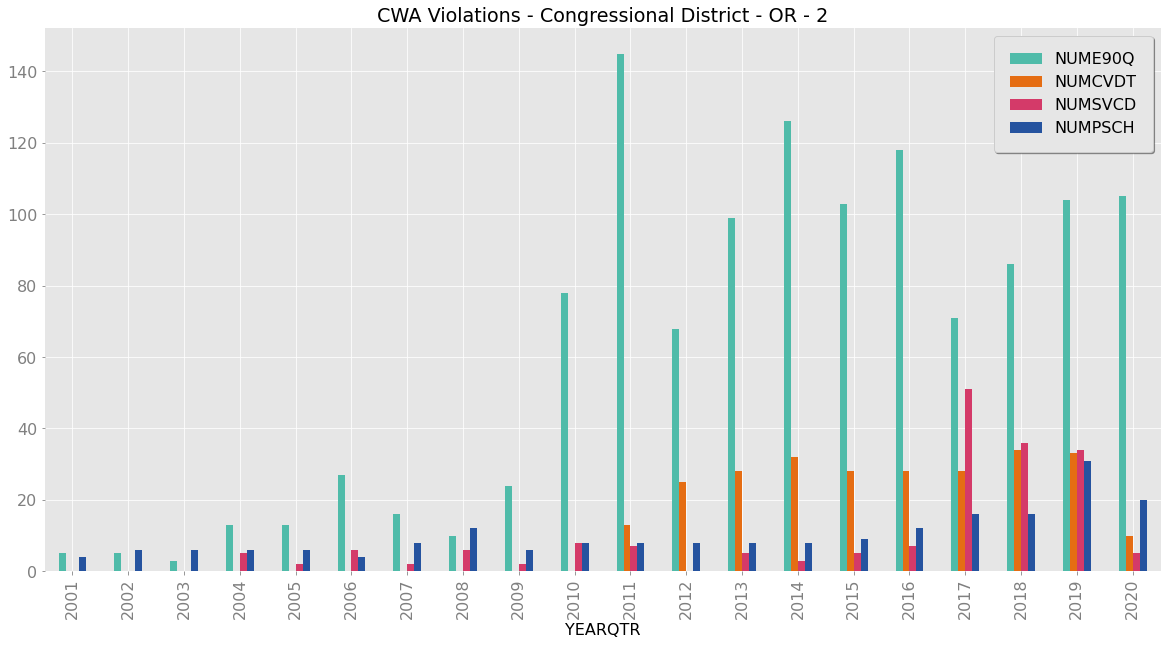

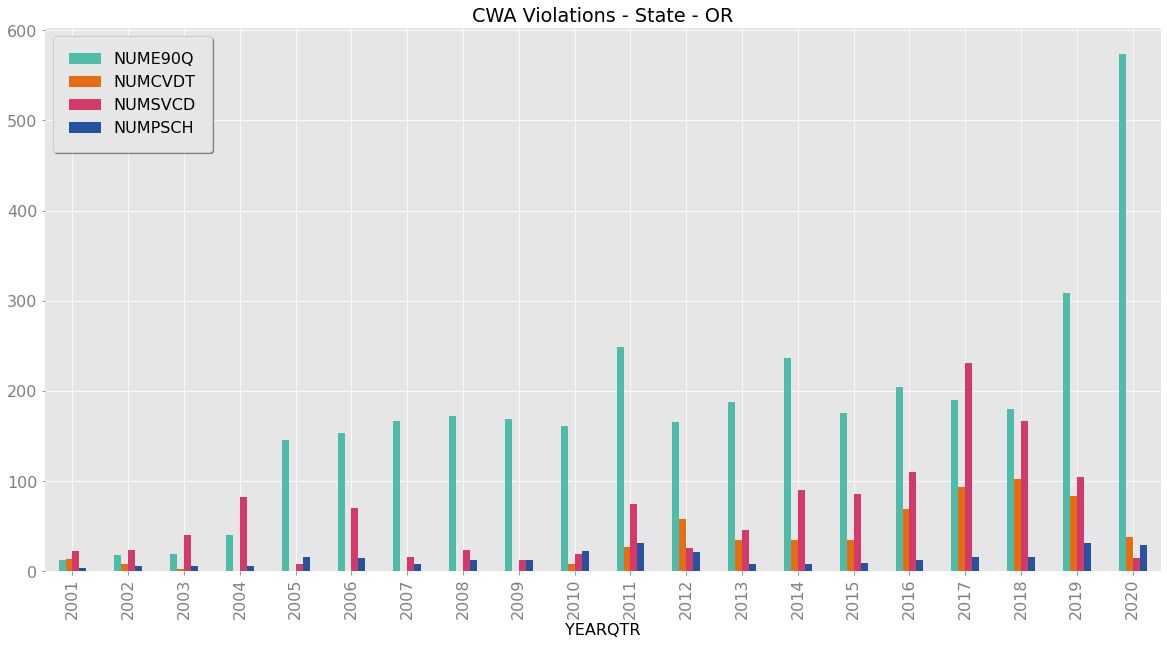

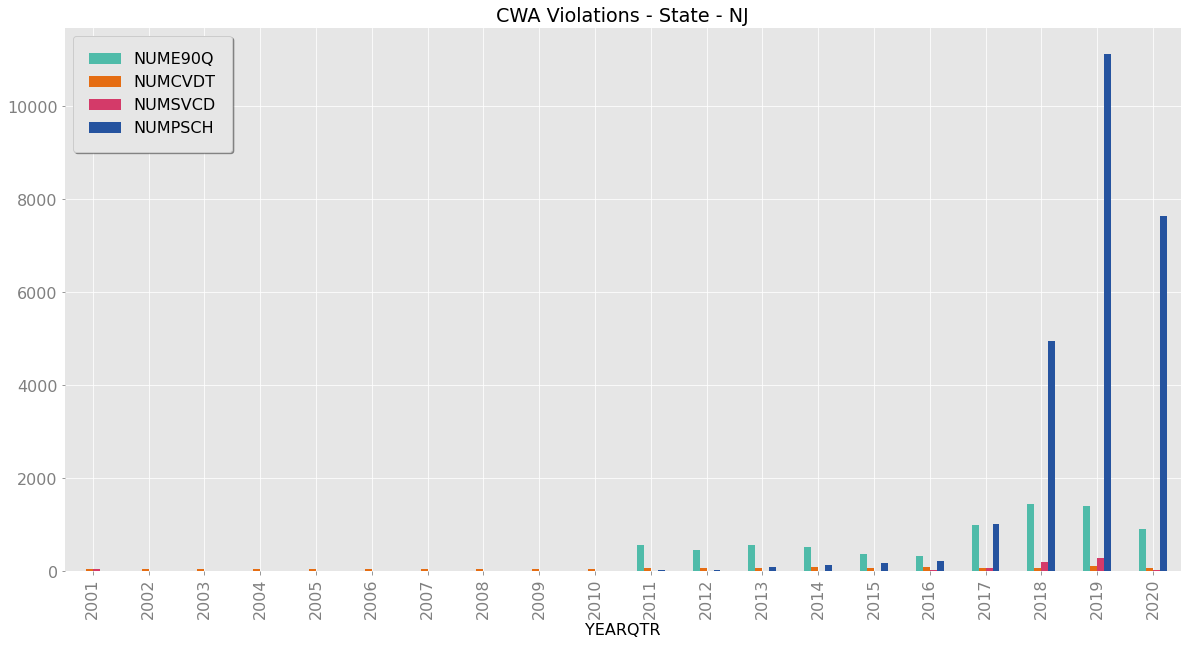

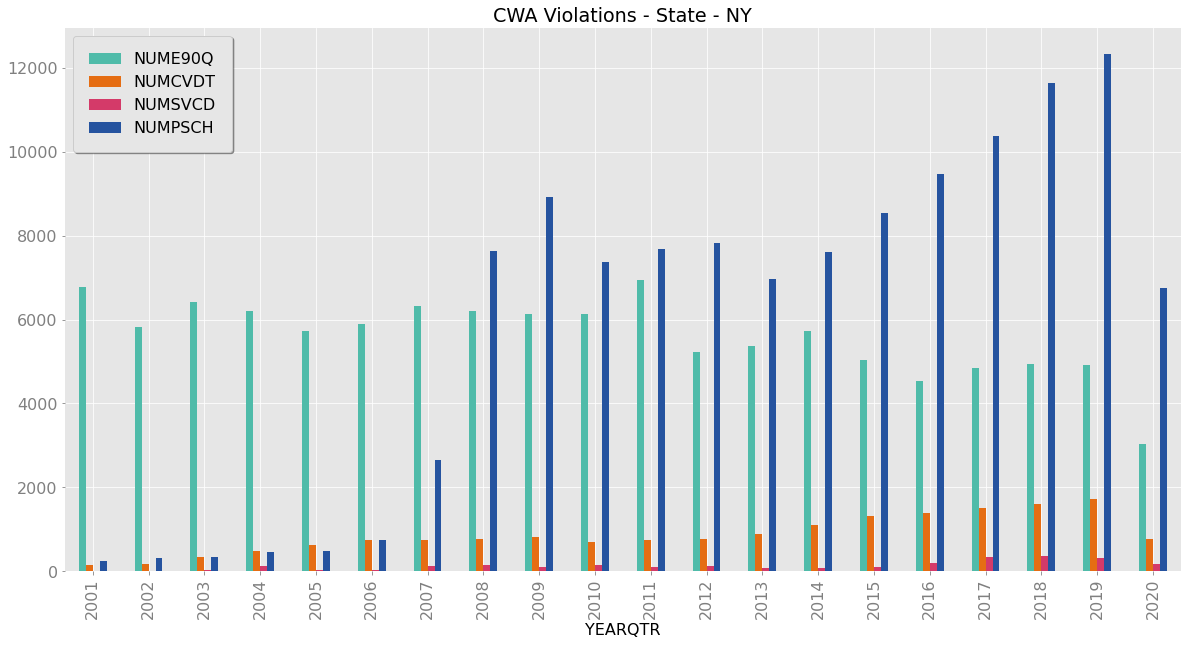

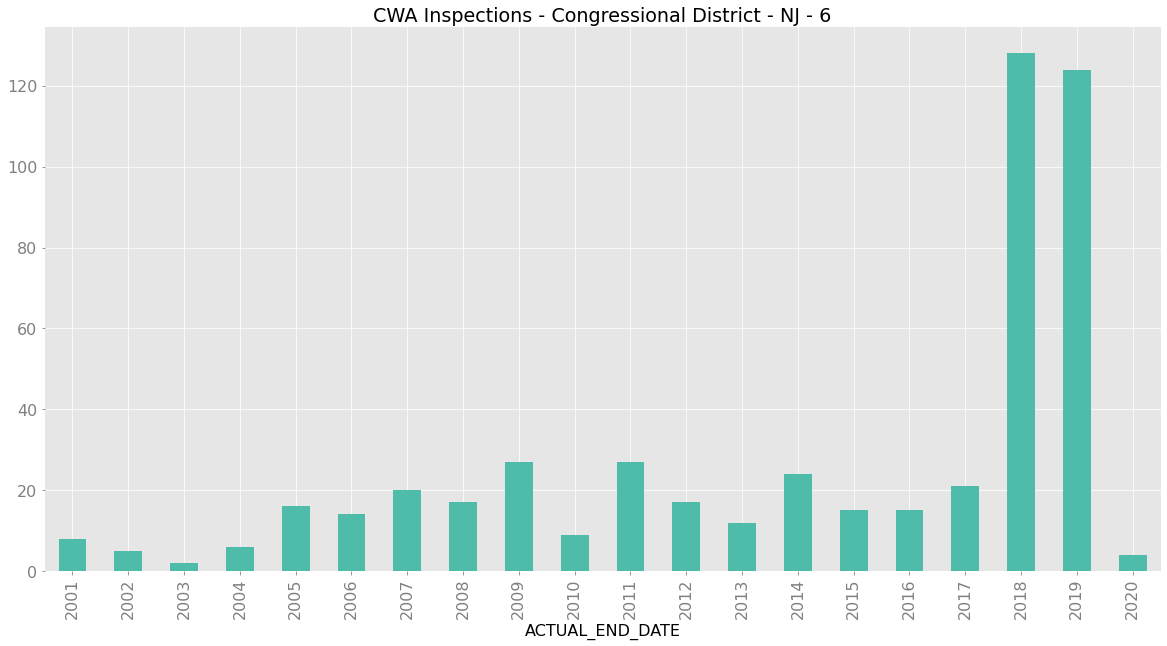

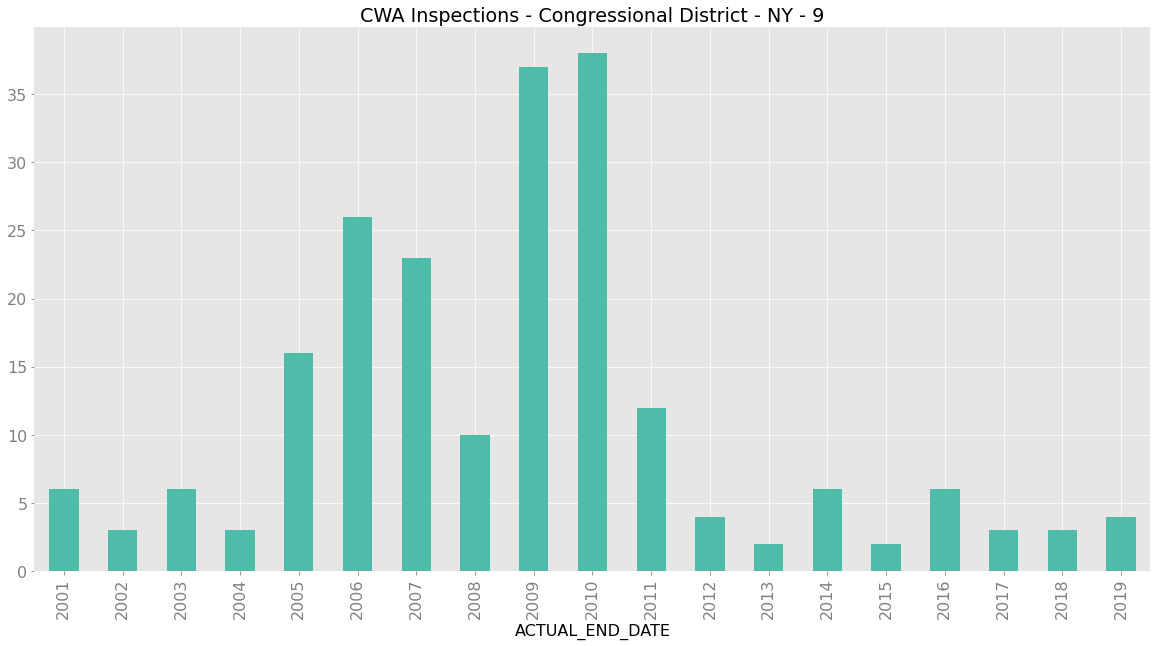

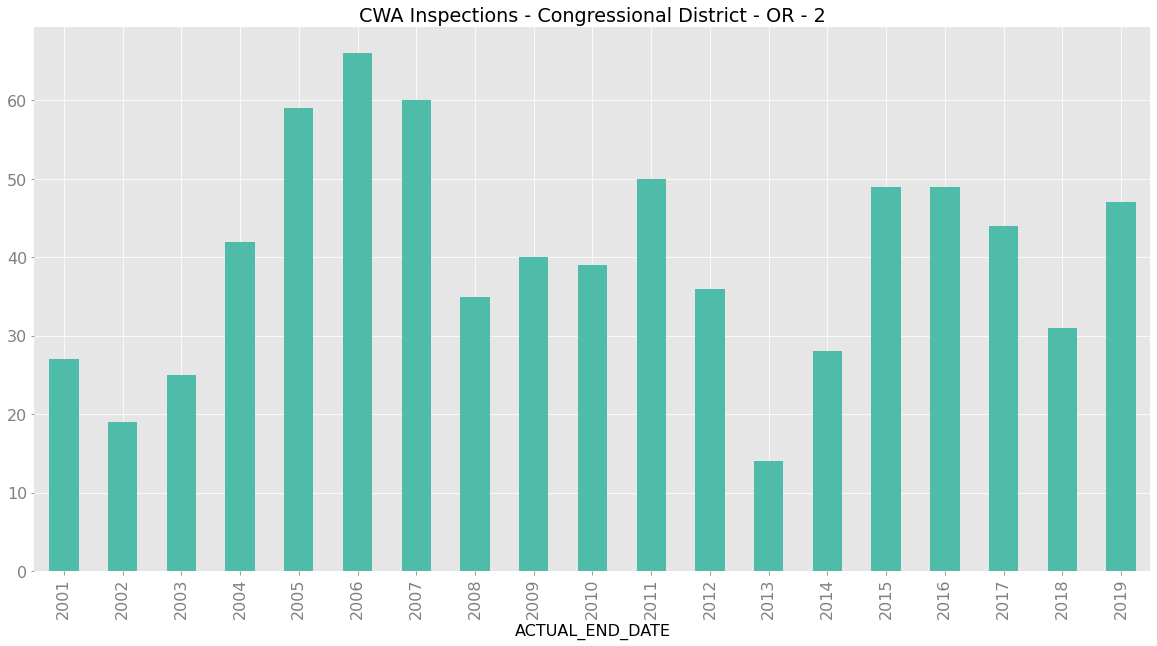

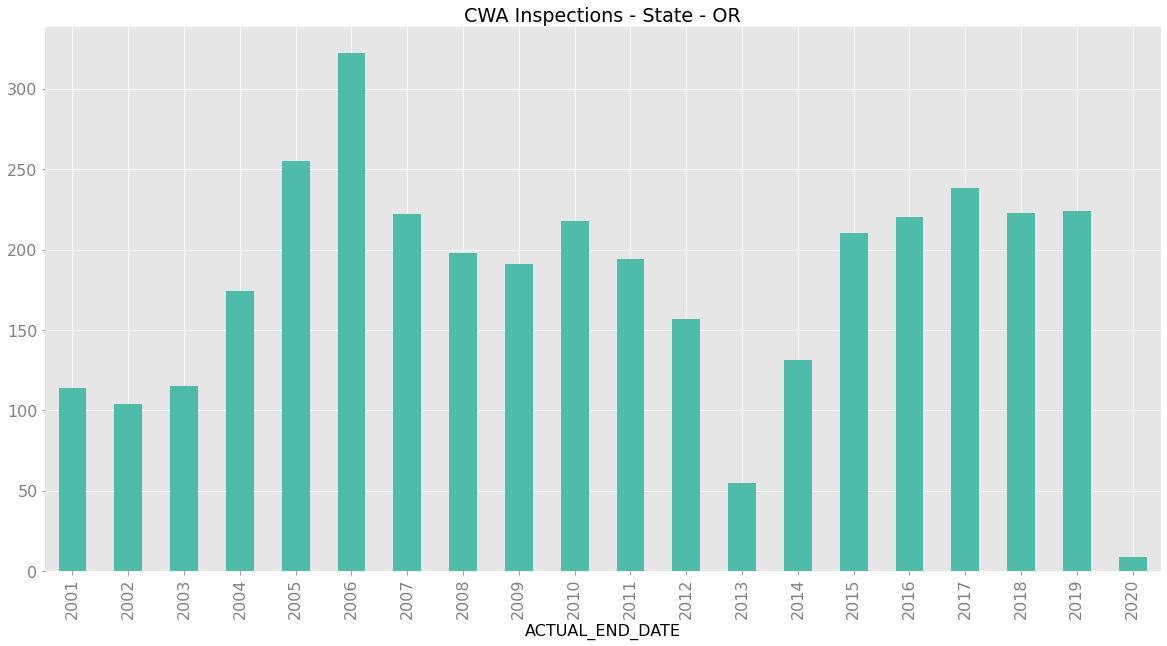

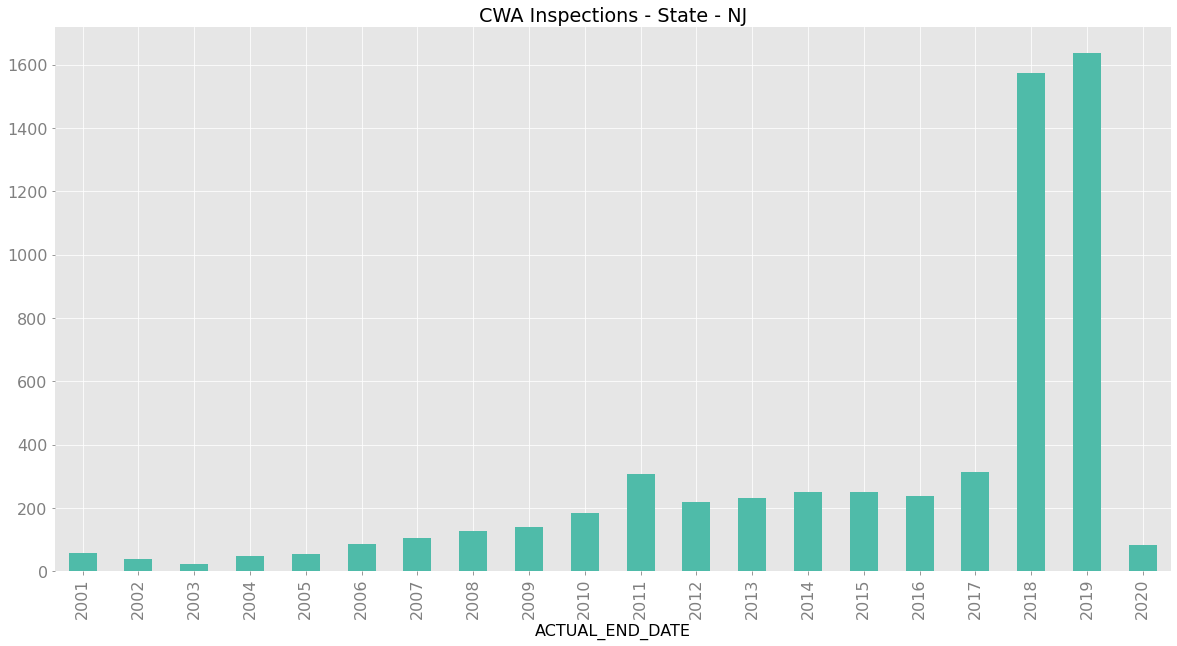

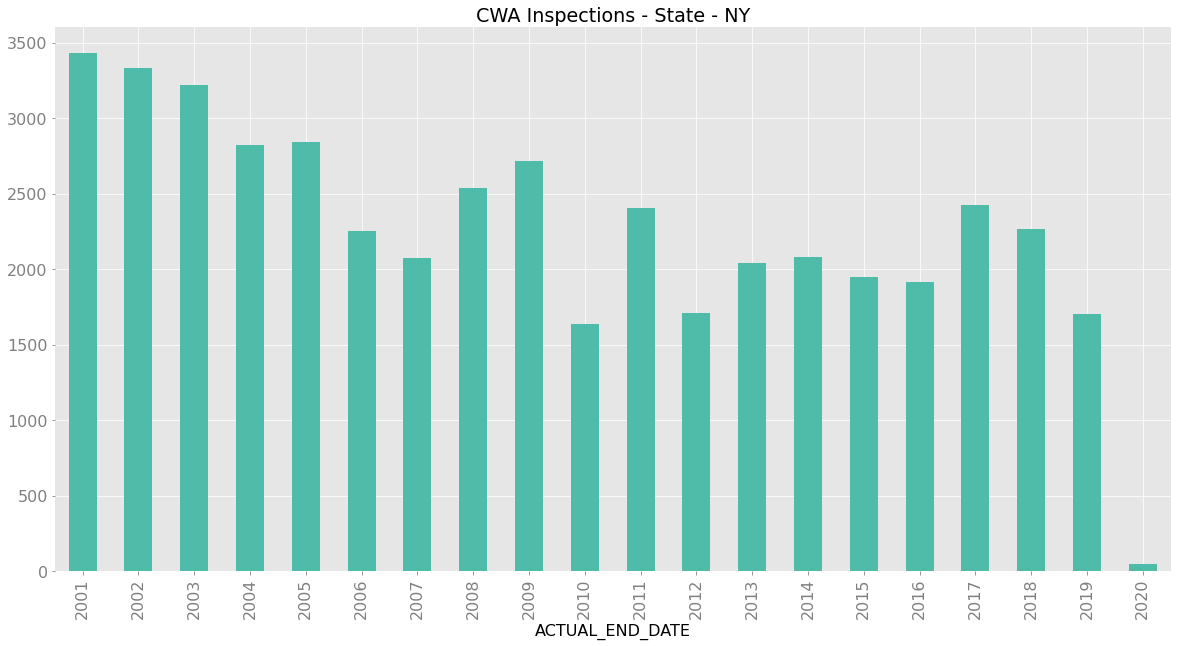

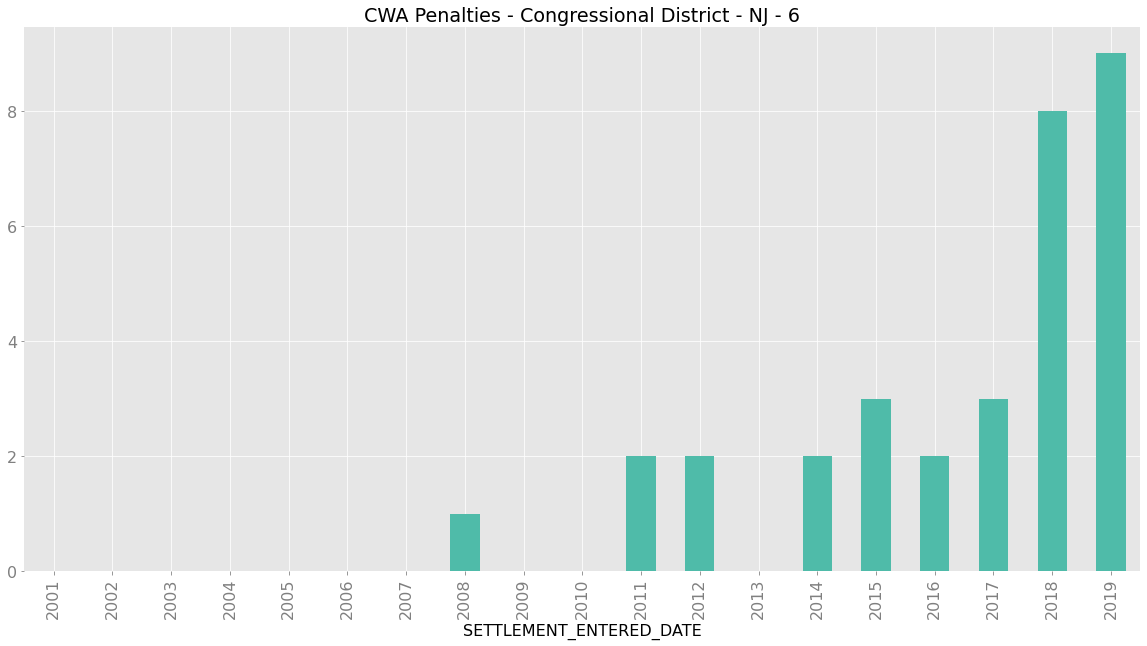

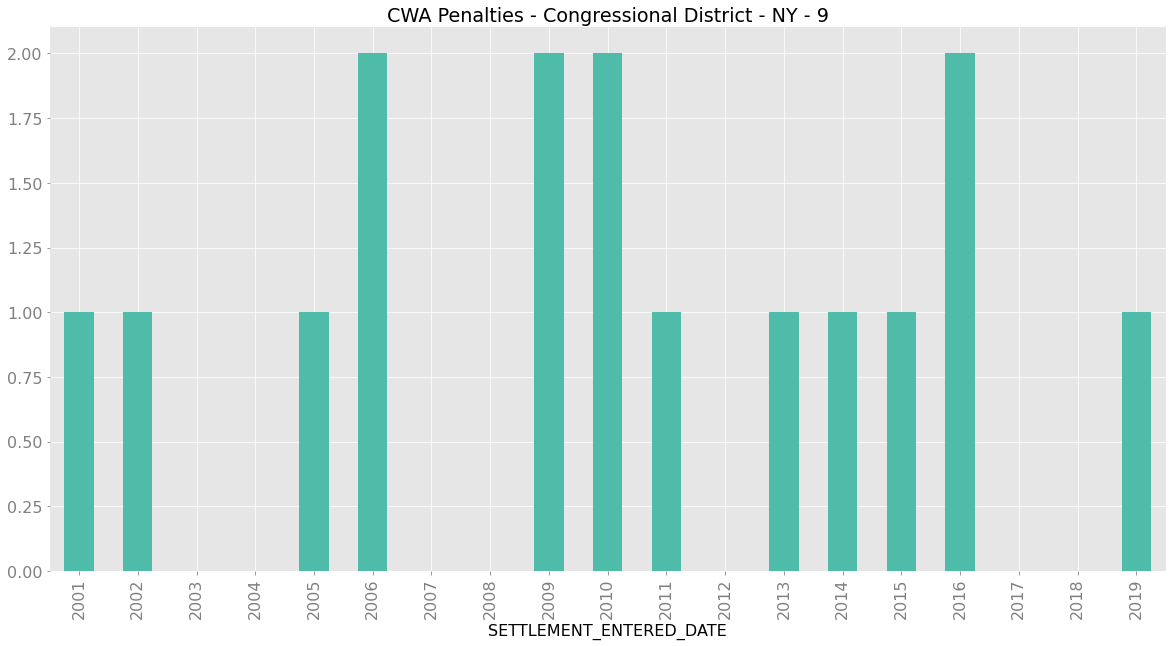

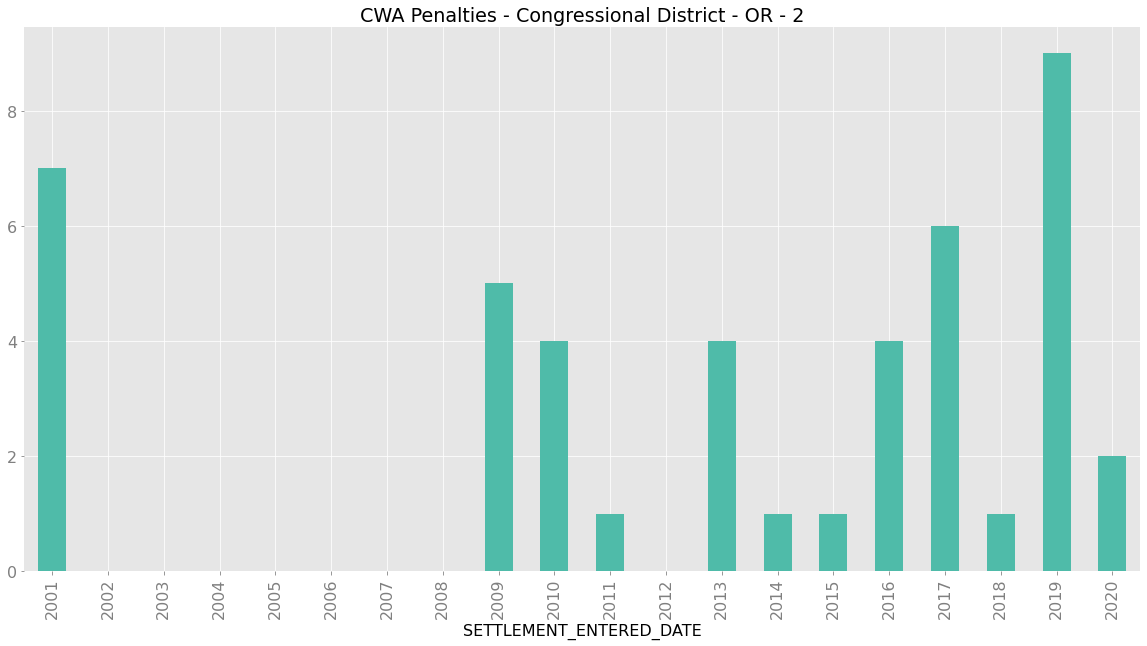

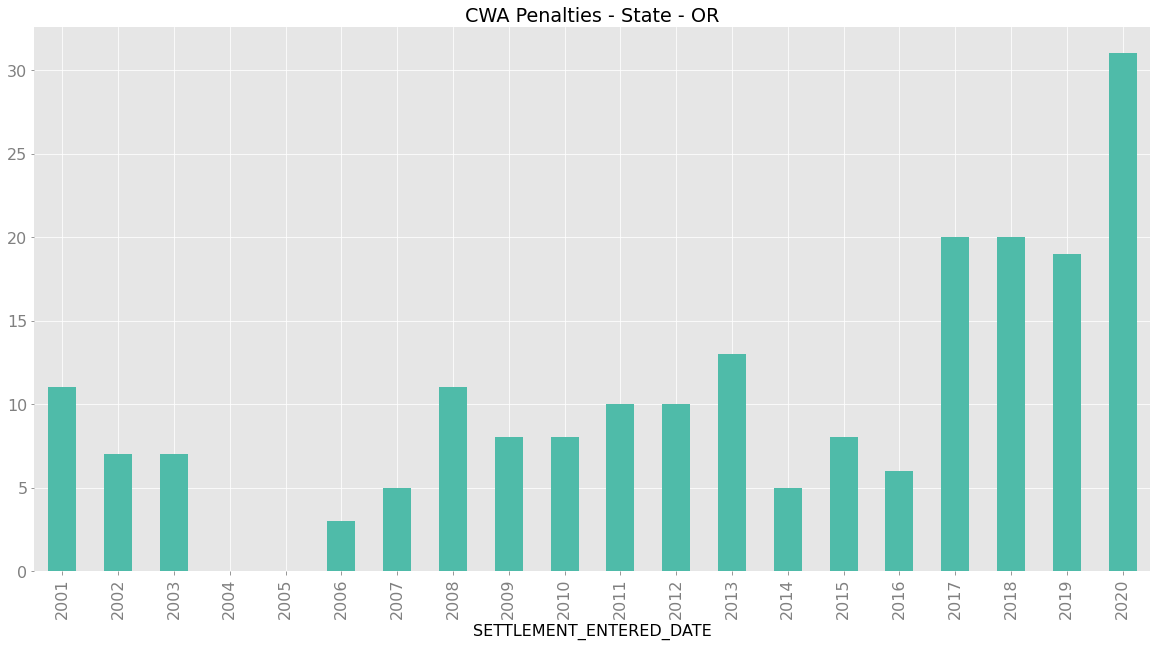

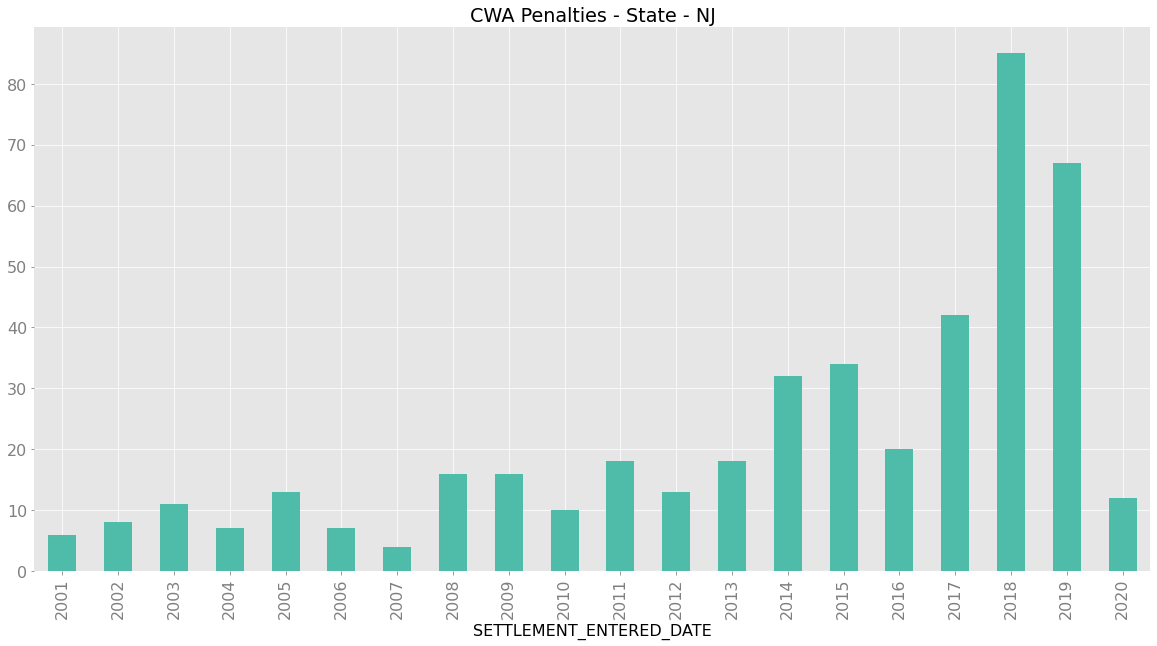

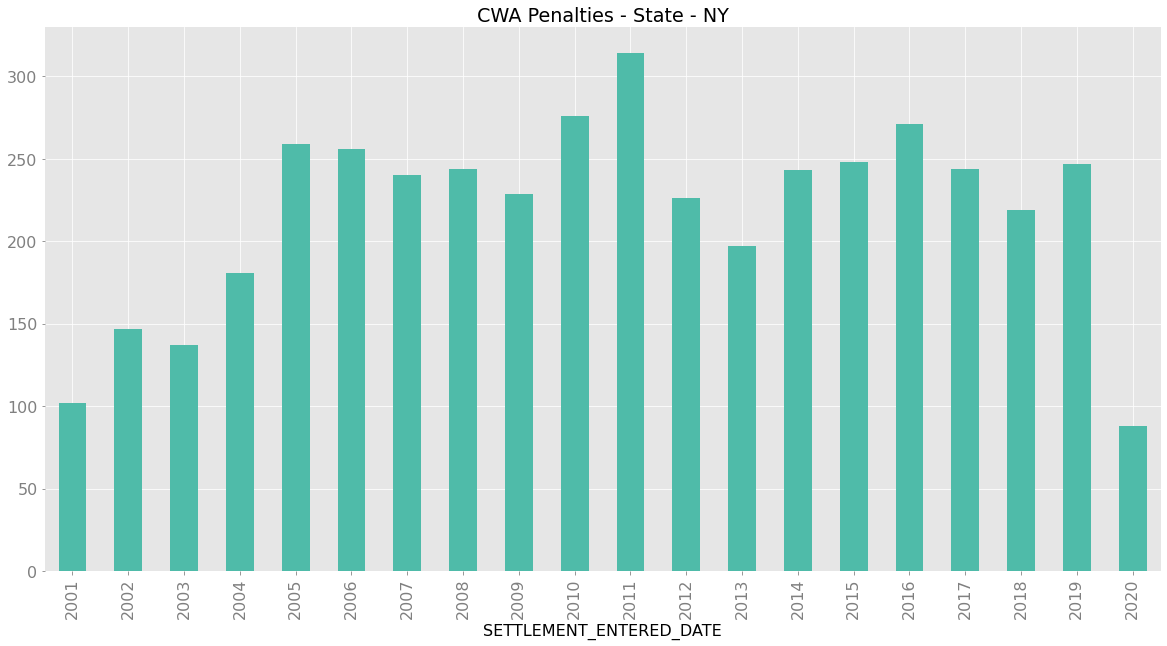

In [4]:
for ds_key, data_set in data_sets.items():
    print( ds_key )
    if ( ds_key != 'RCRA Penalties' ):
        data_set.show_charts()

### 6. Get the State data for comparisons

In [5]:
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique
state_echo_data = {}
state_echo_active = {}
for state in states:
    state_echo_data[state] = read_file( 'ECHO_EXPORTER', 'State', state, None )
    if ( state_echo_data[state] is None ):
        sql = 'select * from "ECHO_EXPORTER" where "FAC_STATE" = \'{}\''.format( state )
        state_echo_data[state] = get_data( sql, 'REGISTRY_ID' )
        write_dataset( state_echo_data[state], 'ECHO_EXPORTER', 'State', state, None )
    state_echo_active[state] = state_echo_data[state].loc[state_echo_data[state]['FAC_ACTIVE_FLAG']=='Y']
    print( 'There are {} active facilities in {}.'.format( 
        str(state_echo_active[state].shape[0]), state))


/home/steve/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (5,11,119) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Wrote ECHO_EXPORTER-OR-State.csv
There are 8848 active facilities in OR.


/home/steve/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (5,20,74,119) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Wrote ECHO_EXPORTER-NJ-State.csv
There are 27504 active facilities in NJ.


/home/steve/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (5,57,119) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Wrote ECHO_EXPORTER-NY-State.csv
There are 50807 active facilities in NY.


### 7. Number of currently active facilities regulated in CAA, CWA, RCRRA, GHGRP

In [6]:
def program_count( echo_data, program, flag, state, cd ):
    count = echo_data.loc[echo_data[flag]=='Y'].shape[0]
    print( 'There are {} active facilities in {} CD {} tracked under {}.'.format( 
        str( count ), state, cd, program))
    return count
    
cd_echo_data = {}
cd_echo_active = {}
for state, cd in state_cds:
    rowdata = []    
    cd_echo_data[cd] = state_echo_data[state].loc[state_echo_data[state]['FAC_DERIVED_CD113'] == cd]
    cd_echo_active[cd] = cd_echo_data[cd].loc[cd_echo_data[cd]['FAC_ACTIVE_FLAG']=='Y']
    rowdata.append( ['CAA', program_count( cd_echo_active[cd], 'CAA', 'AIR_FLAG', state, cd)] )
    rowdata.append( ['CWA', program_count( cd_echo_active[cd], 'CWA', 'NPDES_FLAG', state, cd)] )
    rowdata.append( ['RCRA', program_count( cd_echo_active[cd], 'RCRA', 'RCRA_FLAG', state, cd)] )
    rowdata.append( ['GHG', program_count( cd_echo_active[cd], 'GHG', 'GHG_FLAG', state, cd)] )
    filename = make_filename( 'active-facilities_All_pg3', 'Congressional District', 
                             state, cd )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'Count']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        writer.writerows( rowdata ) 
        print( "Wrote {}".format( filename ))
        

There are 453 active facilities in NJ CD 6 tracked under CAA.
There are 607 active facilities in NJ CD 6 tracked under CWA.
There are 984 active facilities in NJ CD 6 tracked under RCRA.
There are 12 active facilities in NJ CD 6 tracked under GHG.
Wrote active-facilities_All_pg3_NJ-6-081320.csv
There are 350 active facilities in NY CD 9 tracked under CAA.
There are 4 active facilities in NY CD 9 tracked under CWA.
There are 650 active facilities in NY CD 9 tracked under RCRA.
There are 0 active facilities in NY CD 9 tracked under GHG.
Wrote active-facilities_All_pg3_NY-9-081320.csv
There are 80 active facilities in OR CD 2 tracked under CAA.
There are 551 active facilities in OR CD 2 tracked under CWA.
There are 702 active facilities in OR CD 2 tracked under RCRA.
There are 24 active facilities in OR CD 2 tracked under GHG.
Wrote active-facilities_All_pg3_OR-2-081320.csv


### 8. Map all currently active facilities in the state

In [ ]:
for state, cd in state_cds:
    print( 'Map for {} CD {}'.format( state, cd ))
    m = mapper(cd_echo_active[cd])
    display( m )

### 9. Number of recurring violations - total facilities with 3+ quarters out of the last 12 in non-compliance, by each program

In [7]:
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique

def get_rowdata( df, field, flag ):
    count_viol = df.loc[((df[field].str.count("S") + 
                df[field].str.count("V")) >= 3)].shape[0]
    fraction_viol = count_viol/df.loc[df[flag]=='Y'].shape[0]
    print( "    {} facility quarterly violations in the past 3 years".format( count_viol ))
    print( "    {:.2%} of active facilities with violations in the past 3 years".format( 
           fraction_viol ))
    return (count_viol, fraction_viol * 100.)

rowdata_state = {}
for state in states:
    print( "State: {}".format( state ))
    print( "  CAA")
    rowdata_state[state] = []
    rd = get_rowdata( state_echo_data[state], 'CAA_3YR_COMPL_QTRS_HISTORY', 'AIR_FLAG')
    rowdata_state[state].append([ 'CAA', state, '', rd[0], rd[1]])
    print( "  CWA")
    rd = get_rowdata( state_echo_data[state], 'CWA_13QTRS_COMPL_HISTORY', 'NPDES_FLAG')
    rowdata_state[state].append([ 'CWA', state, '', rd[0], rd[1]])
    print( "  RCRA")
    rd = get_rowdata( state_echo_data[state], 'RCRA_3YR_COMPL_QTRS_HISTORY', 'RCRA_FLAG')
    rowdata_state[state].append([ 'RCRA', state, '', rd[0], rd[1]])

for state, cd in state_cds:
    rowdata_cd = []
    print( "{} - CD {}".format( state, cd ))
    print( "  CAA")
    rd = get_rowdata( cd_echo_data[cd], 'CAA_3YR_COMPL_QTRS_HISTORY', 'AIR_FLAG')
    rowdata_cd.append([ 'CAA', state, cd, rd[0], rd[1]])
    print( "  CWA")
    rd = get_rowdata( cd_echo_data[cd], 'CWA_13QTRS_COMPL_HISTORY', 'NPDES_FLAG')
    rowdata_cd.append([ 'CWA', state, cd, rd[0], rd[1]])
    print( "  RCRA")
    rd = get_rowdata( cd_echo_data[cd], 'RCRA_3YR_COMPL_QTRS_HISTORY', 'RCRA_FLAG')
    rowdata_cd.append([ 'RCRA', state, cd, rd[0], rd[1]])
    filename = make_filename( 'recurring-violations_All_pg3', 'Congressional District', 
                             state, cd )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'State', 'CD', 'Facilities', 'Percent']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        writer.writerows( rowdata_state[state] ) 
        writer.writerows( rowdata_cd )
        print( "Wrote {}".format( filename ))


State: OR
  CAA
    14 facility quarterly violations in the past 3 years
    3.64% of active facilities with violations in the past 3 years
  CWA
    87 facility quarterly violations in the past 3 years
    2.11% of active facilities with violations in the past 3 years
  RCRA
    38 facility quarterly violations in the past 3 years
    0.36% of active facilities with violations in the past 3 years
State: NJ
  CAA
    17 facility quarterly violations in the past 3 years
    0.27% of active facilities with violations in the past 3 years
  CWA
    2081 facility quarterly violations in the past 3 years
    16.42% of active facilities with violations in the past 3 years
  RCRA
    334 facility quarterly violations in the past 3 years
    0.97% of active facilities with violations in the past 3 years
State: NY
  CAA
    23 facility quarterly violations in the past 3 years
    0.18% of active facilities with violations in the past 3 years
  CWA
    2433 facility quarterly violations in the pa

### 10. % change in effluent violations (CWA)

In [8]:
effluent_violations_2019 = {}  #For use later
for state, cd in state_cds:
    print( "CWA Violations - District: {}".format( cd ))
    df = data_sets["CWA Violations"].results[('Congressional District', cd, state)].dataframe.copy()

    year = df["YEARQTR"].astype("str").str[0:4:1]
    df["YEARQTR"] = year
    df.rename( columns={'YEARQTR':'YEAR'}, inplace=True )
    # Remove fields not relevant to this graph.
    df = df.drop(columns=['FAC_LAT', 'FAC_LONG', 'FAC_ZIP', 
        'FAC_EPA_REGION', 'FAC_DERIVED_WBD', 'FAC_DERIVED_CD113',
        'FAC_PERCENT_MINORITY', 'FAC_POP_DEN'])
    d = df.groupby(pd.to_datetime(df['YEAR'], format="%Y").dt.to_period("Y")).sum()
    d.index = d.index.strftime('%Y')
    d = d[ d.index > '2000' ]
    print( d )
    filename = make_filename( 'effluent-violations_CWA_pg3', 'Congressional District', 
                             state, cd )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Year', 'Violations']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        for row in d.itertuples():
            if ( row[0] == '2019' ):
                effluent_violations_2019[cd] = row[1]
            writer.writerow( [ row[0], row[1]] )
        print( "Wrote {}".format( filename ))


CWA Violations - District: 6
      NUME90Q  NUMCVDT  NUMSVCD  NUMPSCH
YEAR                                    
2001        0        4        0        0
2002        0        4        0        0
2003        0        4        0        0
2004        0        4        0        0
2005        0        4        0        0
2006        0        4        0        0
2007        0        4        0        0
2008        0        4        0        0
2009        0        4        0        0
2010        0        4        0        0
2011       22        5        1        0
2012       24        4        5        0
2013       35        4        1        5
2014       40        4        2        1
2015       23       12        1        2
2016        8       16        5       12
2017      150       16        2      101
2018       97       12        7      432
2019      143       24       30      908
2020      126       12        0      633
Wrote effluent-violations_CWA_pg3_NJ-6-081320.csv
CWA Violations - Di

### 11. % change in inspections

In [9]:
def get_inspections( ds ):
    df_result = None
    df_pgm = ds.results[('Congressional District', cd, state)].dataframe.copy()
    if ( len( df_pgm ) > 0 ):
        df_pgm.rename( columns={ ds.date_field: 'Date',
                            ds.agg_col: 'Count'}, inplace=True )
        df_pgm = df_pgm.groupby(pd.to_datetime(df_pgm['Date'], 
                                        format=ds.date_format))[['Count']].agg('count')
        df_pgm = df_pgm.resample('Y').sum()
        df_pgm.index = df_pgm.index.strftime('%Y')
        df_pgm = df_pgm[ df_pgm.index > '2000' ]
        print( df_pgm )
    else:
        print( "No records")
    return df_pgm
    
for state, cd in state_cds:
    print( "CAA Inspections - {} District: {}".format( state, cd ))
    df_caa = get_inspections( data_sets["CAA Inspections"] )
    print( "CAA Inspections - {} District: {}".format( state, cd ))
    df_cwa = get_inspections( data_sets["CWA Inspections"] )
    print( "CAA Inspections - {} District: {}".format( state, cd ))
    df_rcra = get_inspections( data_sets["RCRA Inspections"] )
    df_totals = pd.concat( [df_caa, df_cwa, df_rcra] )
    df_totals = df_totals.groupby( df_totals.index ).agg('sum')
    print( "Total inspections for {} district {}".format( state,cd ))
    print( df_totals )
    filename = make_filename( 'inspections_All_pg3', 'Congressional District', 
                             state, cd )
    df_totals.to_csv( filename )
    print( "Wrote {}".format( filename ))


CAA Inspections - NJ District: 6
      Count
Date       
2002      2
2003     19
2004     26
2005     36
2006     50
2007     30
2008     18
2009     21
2010     26
2011     36
2012     28
2013     52
2014     20
2015     20
2016     19
2017     15
2018     32
2019     17
2020      1
CAA Inspections - NJ District: 6
      Count
Date       
2001      8
2002      5
2003      2
2004      6
2005     16
2006     14
2007     20
2008     17
2009     27
2010      9
2011     27
2012     17
2013     12
2014     24
2015     15
2016     15
2017     21
2018    128
2019    124
2020      4
CAA Inspections - NJ District: 6
      Count
Date       
2001    154
2002    116
2003    118
2004    131
2005    156
2006    160
2007    134
2008    137
2009    182
2010    181
2011    163
2012    150
2013    130
2014    131
2015    135
2016    117
2017    129
2018    137
2019    115
2020     16
Total inspections for NJ district 6
      Count
Date       
2001    162
2002    123
2003    139
2004    163
2005    208
2

### 12. % change in enforcement - penalties and number of enforcements

In [10]:
def get_enforcements( ds ):
    df_pgm = ds.results[('Congressional District', cd, state)].dataframe.copy()
    if ( len( df_pgm ) > 0 ):
        df_pgm.rename( columns={ ds.date_field: 'Date',
                            ds.agg_col: 'Sum'}, inplace=True )
        df_pgm = df_pgm.groupby(pd.to_datetime(df_pgm['Date'], 
                                        format=ds.date_format))[['Sum']].agg('sum')
        df_pgm_count = df_pgm.copy()
        df_pgm_amount = df_pgm.resample('Y').sum()
        df_pgm_amount.index = df_pgm_amount.index.strftime('%Y')
        df_pgm_amount = df_pgm_amount[ df_pgm_amount.index > '2000' ]
        df_pgm_count = df_pgm_count.groupby(pd.to_datetime(df_pgm_count.index, 
                                        format=ds.date_format))[['Sum']].agg('count')
        df_pgm_count = df_pgm_count.resample('Y').sum()
        df_pgm_count.index = df_pgm_count.index.strftime('%Y')
        df_pgm_count = df_pgm_count[ df_pgm_count.index > '2000' ]
        df_pgm = df_pgm_count.merge( df_pgm_amount, how='left', left_index=True, 
                                    right_index=True )
        df_pgm.rename( columns={ 'Sum_x': 'Count',
                            'Sum_y': 'Amount'}, inplace=True )
        print( df_pgm )
    else:
        print( "No records")
    return df_pgm
    
for state, cd in state_cds:
    print( "CAA Penalties - {} District: {}".format( state, cd ))
    df_caa = get_enforcements( data_sets["CAA Penalties"] )
    print( "CWA Penalties - {} District: {}".format( state, cd ))
    df_cwa = get_enforcements( data_sets["CWA Penalties"] )
    print( "RCRA Penalties - {} District: {}".format( state, cd ))
    df_rcra = get_enforcements( data_sets["RCRA Penalties"] )
    df_totals = pd.concat( [df_caa, df_cwa, df_rcra] )
    df_totals = df_totals.groupby( df_totals.index ).agg('sum')
    print( "Total enforcements for {} district {}".format( state,cd ))
    print( df_totals )
    filename = make_filename( 'enforcements_All_pg3', 'Congressional District', 
                             state, cd )
    df_totals.to_csv( filename )
    print( "Wrote {}".format( filename ))


CAA Penalties - NJ District: 6
      Count   Amount
Date                
2001     18   368500
2002     13   280700
2003     27   537400
2004     25   195100
2005     38   342400
2006     33   918750
2007     22  1030000
2008     19    82600
2009     25   729550
2010     19   390950
2011     15   164420
2012     17  5901645
2013     16    62400
2014     13   139300
2015     15   126600
2016      8    51750
2017      2     2300
2018      6    28495
2019      6    82800
CWA Penalties - NJ District: 6
      Count    Amount
Date                 
2001      0       0.0
2002      0       0.0
2003      0       0.0
2004      0       0.0
2005      0       0.0
2006      0       0.0
2007      0       0.0
2008      1       0.0
2009      0       0.0
2010      0       0.0
2011      2       0.0
2012      2   17000.0
2013      0       0.0
2014      2  425000.0
2015      3    5000.0
2016      2       0.0
2017      3       0.0
2018      7  100000.0
2019      8    7500.0
RCRA Penalties - NJ District: 6
   

### 13. 2019 - inspections per 1000 regulated facilities - by district

In [11]:
def get_num_events( ds, ds_type, state, cd, year='2019' ):
    df_pgm = ds.results[ ds_type ].dataframe.copy()
    if ( len( df_pgm ) > 0 ):
        df_pgm.rename( columns={ ds.date_field: 'Date',
                            ds.agg_col: 'Count'}, inplace=True )
        
        try:
            df_pgm = df_pgm.groupby(pd.to_datetime(df_pgm['Date'], 
                           format=ds.date_format, errors='coerce'))[['Count']].agg('count')
        except ValueError:
            print( "Error with date {}".format(df_pgm['Date']))
        df_pgm = df_pgm.resample('Y').sum()
        df_pgm.index = df_pgm.index.strftime('%Y')
        num_events = df_pgm[ df_pgm.index == year ]
        if ( num_events.empty ):
            return 0
        else:
            return num_events['Count'][0]
    
for state, cd in state_cds:
    ds_type = ('Congressional District', cd, state)
    cd_echo_data[cd] = state_echo_data[state].loc[state_echo_data[state]['FAC_DERIVED_CD113'] == cd]
    cd_echo_active[cd] = cd_echo_data[cd].loc[cd_echo_data[cd]['FAC_ACTIVE_FLAG']=='Y']
    filename = make_filename( 'inspectionsper1000_All_pg4', 'Congressional District', 
                             state, cd )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'Num / 1000']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        try:
            num = 1000. * get_num_events( data_sets["CAA Inspections"], ds_type, state, cd ) / \
                program_count( cd_echo_active[cd], 'CAA', 'AIR_FLAG', state, cd)
            writer.writerow( ['CAA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["CWA Inspections"], ds_type, state, cd ) / \
                program_count( cd_echo_active[cd], 'CWA', 'NPDES_FLAG', state, cd)
            writer.writerow( ['CWA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["RCRA Inspections"], ds_type, state, cd ) / \
                program_count( cd_echo_active[cd], 'RCRA', 'RCRA_FLAG', state, cd)
            writer.writerow( ['RCRA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        print( "Wrote {}".format( filename ))

There are 453 active facilities in NJ CD 6 tracked under CAA.
There are 607 active facilities in NJ CD 6 tracked under CWA.
There are 984 active facilities in NJ CD 6 tracked under RCRA.
Wrote inspectionsper1000_All_pg4_NJ-6-081320.csv
There are 350 active facilities in NY CD 9 tracked under CAA.
There are 4 active facilities in NY CD 9 tracked under CWA.
There are 650 active facilities in NY CD 9 tracked under RCRA.
Wrote inspectionsper1000_All_pg4_NY-9-081320.csv
There are 80 active facilities in OR CD 2 tracked under CAA.
There are 551 active facilities in OR CD 2 tracked under CWA.
There are 702 active facilities in OR CD 2 tracked under RCRA.
Wrote inspectionsper1000_All_pg4_OR-2-081320.csv


### 13. 2019 - inspections per 1000 regulated facilities - by state

In [12]:
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique

for state in states:
    ds_type = ('State', None, state)
    filename = make_filename( 'inspectionsper1000_All_pg4', 'State', state, None )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'Num / 1000']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        try:
            num = 1000. * get_num_events( data_sets["CAA Inspections"], ds_type, state, None ) / \
                program_count( state_echo_active[state], 'CAA', 'AIR_FLAG', state, None)
            writer.writerow( ['CAA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["CWA Inspections"], ds_type, state, None ) / \
                program_count( state_echo_active[state], 'CWA', 'NPDES_FLAG', state, None)
            writer.writerow( ['CWA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["RCRA Inspections"], ds_type, state, None ) / \
                program_count( state_echo_active[state], 'RCRA', 'RCRA_FLAG', state, None)
            writer.writerow( ['RCRA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        print( "Wrote {}".format( filename ))

There are 309 active facilities in OR CD None tracked under CAA.
There are 3066 active facilities in OR CD None tracked under CWA.
There are 4077 active facilities in OR CD None tracked under RCRA.
Wrote inspectionsper1000_All_pg4_OR-081320.csv
There are 6047 active facilities in NJ CD None tracked under CAA.
There are 10692 active facilities in NJ CD None tracked under CWA.
There are 11583 active facilities in NJ CD None tracked under RCRA.
Wrote inspectionsper1000_All_pg4_NJ-081320.csv
There are 12126 active facilities in NY CD None tracked under CAA.
There are 7220 active facilities in NY CD None tracked under CWA.
There are 30973 active facilities in NY CD None tracked under RCRA.
Wrote inspectionsper1000_All_pg4_NY-081320.csv


### 14. 2019 - violations per 1000 regulated facilities - by district

In [13]:
   
for state, cd in state_cds:
    ds_type = ('Congressional District', cd, state)
    filename = make_filename( 'violationsper1000_All_pg4', 'Congressional District', 
                             state, cd )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'Num / 1000']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        try:
            num = 1000. * get_num_events( data_sets["CAA Violations"], ds_type, state, cd ) / \
                program_count( cd_echo_active[cd], 'CAA', 'AIR_FLAG', state, cd)
            writer.writerow( ['CAA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            # Have to handle CWA Violations differently - use saved dictionary from cell 10
            num = 1000. * effluent_violations_2019[cd] / \
                program_count( cd_echo_active[cd], 'CWA', 'NPDES_FLAG', state, cd)
            writer.writerow( ['CWA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["RCRA Violations"], ds_type, state, cd ) / \
                program_count( cd_echo_active[cd], 'RCRA', 'RCRA_FLAG', state, cd)
            writer.writerow( ['RCRA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        print( "Wrote {}".format( filename ))

There are 453 active facilities in NJ CD 6 tracked under CAA.
There are 607 active facilities in NJ CD 6 tracked under CWA.
There are 984 active facilities in NJ CD 6 tracked under RCRA.
Wrote violationsper1000_All_pg4_NJ-6-081320.csv
There are 350 active facilities in NY CD 9 tracked under CAA.
There are 4 active facilities in NY CD 9 tracked under CWA.
There are 650 active facilities in NY CD 9 tracked under RCRA.
Wrote violationsper1000_All_pg4_NY-9-081320.csv
There are 80 active facilities in OR CD 2 tracked under CAA.
There are 551 active facilities in OR CD 2 tracked under CWA.
There are 702 active facilities in OR CD 2 tracked under RCRA.
Wrote violationsper1000_All_pg4_OR-2-081320.csv


### 15. 2019 - violations per 1000 regulated facilities - by state

In [14]:
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique

for state in states:
    ds_type = ('State', None, state)
    filename = make_filename( 'violationsper1000_All_pg4', 'State', state, None )
    with open( filename, 'w', newline='' ) as csvfile:
        header = ['Program', 'Num / 1000']
        writer = csv.writer( csvfile )
        writer.writerow( header )
        try:
            num = 1000. * get_num_events( data_sets["CAA Violations"], ds_type, state, None ) / \
                program_count( state_echo_active[state], 'CAA', 'AIR_FLAG', state, None)
            writer.writerow( ['CAA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["CWA Violations"], ds_type, state, None ) / \
                program_count( state_echo_active[state], 'CWA', 'NPDES_FLAG', state, None)
            writer.writerow( ['CWA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        try:
            num = 1000. * get_num_events( data_sets["RCRA Violations"], ds_type, state, None ) / \
                program_count( state_echo_active[state], 'RCRA', 'RCRA_FLAG', state, None)
            writer.writerow( ['RCRA', num] )
        except pd.errors.OutOfBoundsDatetime:
            print( "Bad date in state CWA data")
        print( "Wrote {}".format( filename ))

There are 309 active facilities in OR CD None tracked under CAA.
There are 3066 active facilities in OR CD None tracked under CWA.
There are 4077 active facilities in OR CD None tracked under RCRA.
Wrote violationsper1000_All_pg4_OR-081320.csv
There are 6047 active facilities in NJ CD None tracked under CAA.
There are 10692 active facilities in NJ CD None tracked under CWA.
There are 11583 active facilities in NJ CD None tracked under RCRA.
Wrote violationsper1000_All_pg4_NJ-081320.csv
There are 12126 active facilities in NY CD None tracked under CAA.
There are 7220 active facilities in NY CD None tracked under CWA.
There are 30973 active facilities in NY CD None tracked under RCRA.
Wrote violationsper1000_All_pg4_NY-081320.csv


### 16. enforcement counts and amounts in this district per violating facility (since 2017)

In [17]:
def get_num_facilities( program, ds_type, year=2017 ):
    ds = data_sets[program]
    df_pgm = ds.results[ ds_type ].dataframe.copy()
    if ( len( df_pgm ) > 0 ):
        df_pgm.rename( columns={ ds.date_field: 'Date',
                            ds.agg_col: 'Count'}, inplace=True )
        if ( program == 'CWA Violations' ):
            yr = df_pgm['Date'].astype( 'str' ).str[0:4:1]
            df_pgm['Date'] = pd.to_datetime( yr, format="%Y" )
        else:
            df_pgm['Date'] = pd.to_datetime( df_pgm['Date'], format=ds.date_format, errors='coerce' )
        df_pgm_year = df_pgm[ df_pgm['Date'].dt.year >= year].copy()
        df_pgm_year['Date'] = pd.DatetimeIndex( df_pgm_year['Date']).year
        num_fac = len(df_pgm_year[ds.idx_field].unique())            
        return num_fac

def get_enf_per_fac( ds_enf, ds_type, num_fac, year='2017' ):
    df_pgm = ds_enf.results[ ds_type ].dataframe.copy()
    if ( len( df_pgm ) > 0 ):
        df_pgm.rename( columns={ ds_enf.date_field: 'Date',
                            ds_enf.agg_col: 'Sum'}, inplace=True )
        df_pgm = df_pgm.groupby(pd.to_datetime(df_pgm['Date'], 
                            format=ds_enf.date_format, errors='coerce'))[['Sum']].agg('sum')
        df_pgm_count = df_pgm.copy()
        df_pgm_amount = df_pgm.resample('Y').sum()
        df_pgm_amount.index = df_pgm_amount.index.strftime('%Y')
        df_pgm_amount = df_pgm_amount[ df_pgm_amount.index >= year ]
        df_pgm_count = df_pgm_count.groupby(pd.to_datetime(df_pgm_count.index, 
                            format=ds_enf.date_format, errors='coerce'))[['Sum']].agg('count')
        df_pgm_count = df_pgm_count.resample('Y').count()
        df_pgm_count.index = df_pgm_count.index.strftime('%Y')
        df_pgm_count = df_pgm_count[ df_pgm_count.index >= year ]
        df_pgm = df_pgm_count.merge( df_pgm_amount, how='left', left_index=True, 
                                    right_index=True )
        df_pgm.rename( columns={ 'Sum_x': 'Count',
                            'Sum_y': 'Amount'}, inplace=True )
        
        df_pgm['Num_enf_per_fac'] = df_pgm.apply( 
            lambda row: None if ( num_fac == 0 ) else row.Count / num_fac, axis=1 )
        df_pgm['Amt_enf_per_fac'] = df_pgm.apply( 
            lambda row: None if ( num_fac == 0 ) else row.Amount / num_fac, axis=1 )
    else:
        print( "No records")
    return df_pgm
    
for state, cd in state_cds:
    ds_type = ('Congressional District', cd, state)
    num_fac = get_num_facilities( "CAA Violations", ds_type )
    print( "CAA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_caa = get_enf_per_fac( data_sets["CAA Penalties"], ds_type, num_fac )
    num_fac = get_num_facilities( "CWA Violations", ds_type )
    print( "CWA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_cwa = get_enf_per_fac( data_sets["CWA Penalties"], ds_type, num_fac )
    num_fac = get_num_facilities( "RCRA Violations", ds_type )
    print( "RCRA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_rcra = get_enf_per_fac( data_sets["RCRA Penalties"], ds_type, num_fac )
    df_totals = pd.concat( [df_caa, df_cwa, df_rcra] )
    df_totals = df_totals.groupby( df_totals.index ).agg('sum')
    print( "Total enforcements for {} district {}".format( state,cd ))
    print( df_totals )
    filename = make_filename( 'enforcementsperviolatingfacility_All_pg4', 'Congressional District', 
                             state, cd )
    df_totals.to_csv( filename )
    print( "Wrote {}".format( filename ))



CAA Penalties - NJ District: 6 - 0 facilities with violations
CWA Penalties - NJ District: 6 - 554 facilities with violations
RCRA Penalties - NJ District: 6 - 27 facilities with violations
Total enforcements for NJ district 6
      Count    Amount  Num_enf_per_fac  Amt_enf_per_fac
Date                                                   
2017     27   29625.0         0.820230      1012.037037
2018     39  160945.0         0.975598      1382.357267
2019     43  158475.0         1.088515      2538.537906
2020      4    8100.0         0.148148       300.000000
Wrote enforcementsperviolatingfacility_All_pg4_NJ-6-081320.csv
CAA Penalties - NY District: 9 - 1 facilities with violations
CWA Penalties - NY District: 9 - 8 facilities with violations
RCRA Penalties - NY District: 9 - 13 facilities with violations
Total enforcements for NY district 9
      Count   Amount  Num_enf_per_fac  Amt_enf_per_fac
Date                                                  
2017      6      0.0         0.461538  

### 17. enforcement counts and amounts in this state per violating facility (since 2017)

In [18]:
states = list(set([s_cd[0] for s_cd in state_cds]))  #Use conversion to set to make unique

for state in states:
    ds_type = ('State', None, state)
    num_fac = get_num_facilities( "CAA Violations", ds_type )
    print( "CAA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_caa = get_enf_per_fac( data_sets["CAA Penalties"], ds_type, num_fac )
    num_fac = get_num_facilities( "CWA Violations", ds_type )
    print( "CWA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_cwa = get_enf_per_fac( data_sets["CWA Penalties"], ds_type, num_fac )
    num_fac = get_num_facilities( "RCRA Violations", ds_type )
    print( "RCRA Penalties - {} District: {} - {} facilities with violations".format( state, cd, num_fac ))
    df_rcra = get_enf_per_fac( data_sets["RCRA Penalties"], ds_type, num_fac )
    df_totals = pd.concat( [df_caa, df_cwa, df_rcra] )
    df_totals = df_totals.groupby( df_totals.index ).agg('sum')
    print( "Total enforcements for {} district {}".format( state,cd ))
    print( df_totals )
    filename = make_filename( 'enforcementsperviolatingfacility_All_pg4', 'State', 
                             state, None )
    df_totals.to_csv( filename )
    print( "Wrote {}".format( filename ))


CAA Penalties - OR District: 2 - 11 facilities with violations
CWA Penalties - OR District: 2 - 4019 facilities with violations
RCRA Penalties - OR District: 2 - 160 facilities with violations
Total enforcements for OR district 2
      Count     Amount  Num_enf_per_fac  Amt_enf_per_fac
Date                                                    
2017     81   219697.0         0.742866      4471.121023
2018     81   375539.0         0.809522     17316.200568
2019     67   296044.2         0.740025     13465.083756
2020     42  1335285.0         0.311795    120932.386364
Wrote enforcementsperviolatingfacility_All_pg4_OR-081320.csv
CAA Penalties - NJ District: 2 - 2 facilities with violations
CWA Penalties - NJ District: 2 - 8786 facilities with violations
RCRA Penalties - NJ District: 2 - 409 facilities with violations
Total enforcements for NJ district 2
      Count      Amount  Num_enf_per_fac  Amt_enf_per_fac
Date                                                     
2017    278  1617681.6

### 18.  GHG emissions in this district, nationally, and statewide (2018)